# **Overview **

This cell imports the essential Python libraries needed for the analysis.

import pandas as pd: Imports the Pandas library, which is the cornerstone for data manipulation and analysis in Python. We use it to create and work with DataFrames (structured, table-like data).

import numpy as np: Imports the NumPy library, which is fundamental for scientific computing, especially for handling numerical operations and arrays.

import seaborn as sns and import matplotlib.pyplot as plt: These import the two main data visualization libraries. Matplotlib is a foundational plotting library, while Seaborn is built on top of it to create more statistically attractive and informative plots with less code.

sns.set(style="whitegrid"): This is an aesthetic choice that sets a clean, grid-based style for all subsequent Seaborn plots.



In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Data**

Overview: This cell loads the data from its source on the internet and performs an initial inspection.

url: A string containing the direct web address of the raw data file.

column_names: A list of names for the columns. The raw data file does not have a header row, so we must provide these names ourselves.

pd.read_csv(...): This Pandas function reads the data.

names=column_names: Assigns our defined names to the columns.

na_values='?': This is a crucial step. It tells Pandas that any cell containing a question mark ('?') should be treated as a missing value (NaN).

df.head(): Displays the first 5 rows to give us a quick look at the data structure.

df.shape: Prints the dimensions of the DataFrame (number of rows, number of columns).

df.info(): Provides a concise summary of the DataFrame, including the data type of each column and the number of non-missing values. This is our first clue about missing data.



In [6]:
# 1. Load Data
# ---
# Load the dataset from the UCI Machine Learning Repository.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
df = pd.read_csv(url, names=column_names, na_values='?')

print("--- Initial Data Overview ---")
print("First 5 rows of the dataset:")
print(df.head())
print("\nShape of the dataset:", df.shape)
print("\nData types and non-null values:")
df.info()

--- Initial Data Overview ---
First 5 rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Shape of the dataset: (303, 14)

Data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex  

# **Data Cleaning**


Overview: This cell addresses the missing values identified in the previous step.

df.isnull().sum(): This command counts the number of missing (NaN) values in each column. We see that 'ca' and 'thal' have missing data.

Imputation Loop: Instead of dropping the rows (which would mean losing data), we impute them.

df[col].mode()[0]: For each column ('ca' and 'thal'), we calculate the mode, which is the most frequently occurring value. This is a good strategy for categorical or discrete data.

df.loc[:, col] = df[col].fillna(mode_val): We use .loc to access the column and fillna() to replace all NaN values with the calculated mode. Using .loc helps prevent a common SettingWithCopyWarning in Pandas.

astype(int): After filling the missing values, we convert the 'ca' and 'thal' columns to the integer data type, as they represent counts or categories.



In [7]:
# 2. Data Cleaning
# ---
# Handle missing values and correct data types.

print("\n--- Data Cleaning ---")
print("Missing values before cleaning:")
print(df.isnull().sum())

# Impute missing values in 'ca' and 'thal' with their mode.
for col in ['ca', 'thal']:
    mode_val = df[col].mode()[0]
    df.loc[:, col] = df[col].fillna(mode_val)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Convert 'ca' and 'thal' to integer types
df.loc[:, 'ca'] = df['ca'].astype(int)
df.loc[:, 'thal'] = df['thal'].astype(int)

print("\nData types after cleaning:")
df.info()


--- Data Cleaning ---
Missing values before cleaning:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Missing values after cleaning:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data types after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalac

**Binary Target Transformation**: The line df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0) is a crucial data transformation. Your original dataset's target column had values 0, 1, 2, 3, and 4. This code simplifies the problem from multi-class to binary classification by converting all values greater than 0 (which indicate any level of disease) to 1, and keeping 0 as "No Disease."

**Visualization & Verification**:

sns.countplot(...): This seaborn function creates a bar chart showing the total count of patients for each unique value in the target column.

palette='bwr': This sets the color scheme to 'blue-white-red', assigning one color to class 0 and another to class 1.

print(df['target'].value_counts()): This line is a final check. It prints the exact number of patients in each category (e.g., 164 for '0' and 139 for '1'), confirming that the dataset is well-balanced for modeling.

target
0    164
1    139
Name: count, dtype: int64


/tmp/ipython-input-2941232940.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='bwr')


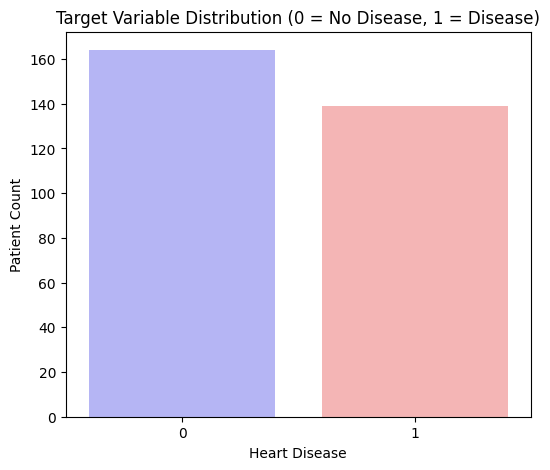

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Assuming 'df' is your DataFrame after cleaning ---
# This line, also from cell 8, is needed to create the binary target
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# This is the code for the plot itself
plt.figure(figsize=(6, 5)) # You can add this line to set a good size
sns.countplot(x='target', data=df, palette='bwr')
plt.title('Target Variable Distribution (0 = No Disease, 1 = Disease)')
plt.xlabel('Heart Disease')
plt.ylabel('Patient Count')

# This line prints the exact counts below the plot
print(df['target'].value_counts())

plt.show()

# **Target Variable Transformation**

Overview: This cell simplifies the problem from a multi-class to a binary classification task.

The Problem: The original 'target' column has values 0 (no disease) and 1, 2, 3, 4 (varying degrees of disease). For many models, it's easier to start by predicting a simple "yes" or "no".

The Solution: We use .loc and the .apply() method with a lambda function. This function checks each value in the 'target' column: if the value is greater than 0, it's replaced with 1 (disease present); otherwise, it remains 0 (no disease).

value_counts(): We print the counts of the new binary target to confirm our transformation was successful.



In [9]:
# 3. Target Variable Transformation
# ---
# The 'target' column has values from 0 (no disease) to 4.
# We will convert this to a binary classification problem: 0 (no disease) vs. 1 (disease).
print("\n--- Target Variable Transformation ---")
print("Original target value counts:")
print(df['target'].value_counts())

# Convert to binary: 0 = no disease, 1 = disease
df.loc[:, 'target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

print("\nBinary target value counts:")
print(df['target'].value_counts())


--- Target Variable Transformation ---
Original target value counts:
target
0    164
1    139
Name: count, dtype: int64

Binary target value counts:
target
0    164
1    139
Name: count, dtype: int64


# **Univariate Analysis**

Overview: This section analyzes each feature one by one to understand its distribution.

Histograms (sns.histplot): For numerical features ('age', 'chol', etc.), histograms are plotted. These charts show the frequency distribution of the data, allowing us to see if the data is normally distributed, skewed, or has multiple peaks.

Countplots (sns.countplot): For categorical features ('sex', 'cp', etc.), countplots are used. These are essentially bar charts that show the number of occurrences for each category, helping us understand the balance of our dataset.



In [10]:
# 4. Univariate Analysis
# ---
# Analyze individual features.

print("\n--- Univariate Analysis: Feature Distributions ---")

# Separate features into numerical and categorical
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']




--- Univariate Analysis: Feature Distributions ---


# **Histograms: Distribution of Numerical Features**

These plots show the distribution of individual numerical features. Think of them as bar charts for continuous data, telling you how many patients fall into different value ranges.

Distribution of age: The age distribution is fairly spread out and looks somewhat like a bell curve (normal distribution), peaking around the late 50s. This tells you the dataset contains a good mix of middle-aged to older adults.

Distribution of trestbps (Resting Blood Pressure): This distribution is slightly skewed to the right, with most patients having a resting blood pressure between 120 and 140. There are a few patients with very high values, which could be outliers.

Distribution of chol (Cholesterol): Similar to blood pressure, cholesterol levels are also right-skewed. A significant number of patients have high cholesterol levels (above 200), which is a known risk factor.

Distribution of thalach (Max Heart Rate Achieved): This looks reasonably normal, centered around 150-160. It shows the range of maximum heart rates patients achieved during the exercise test.

Distribution of oldpeak (ST Depression): This is heavily skewed to the right. Most patients have a value of 0, meaning no ST depression. This indicates that a high oldpeak value is an unusual and potentially significant finding.


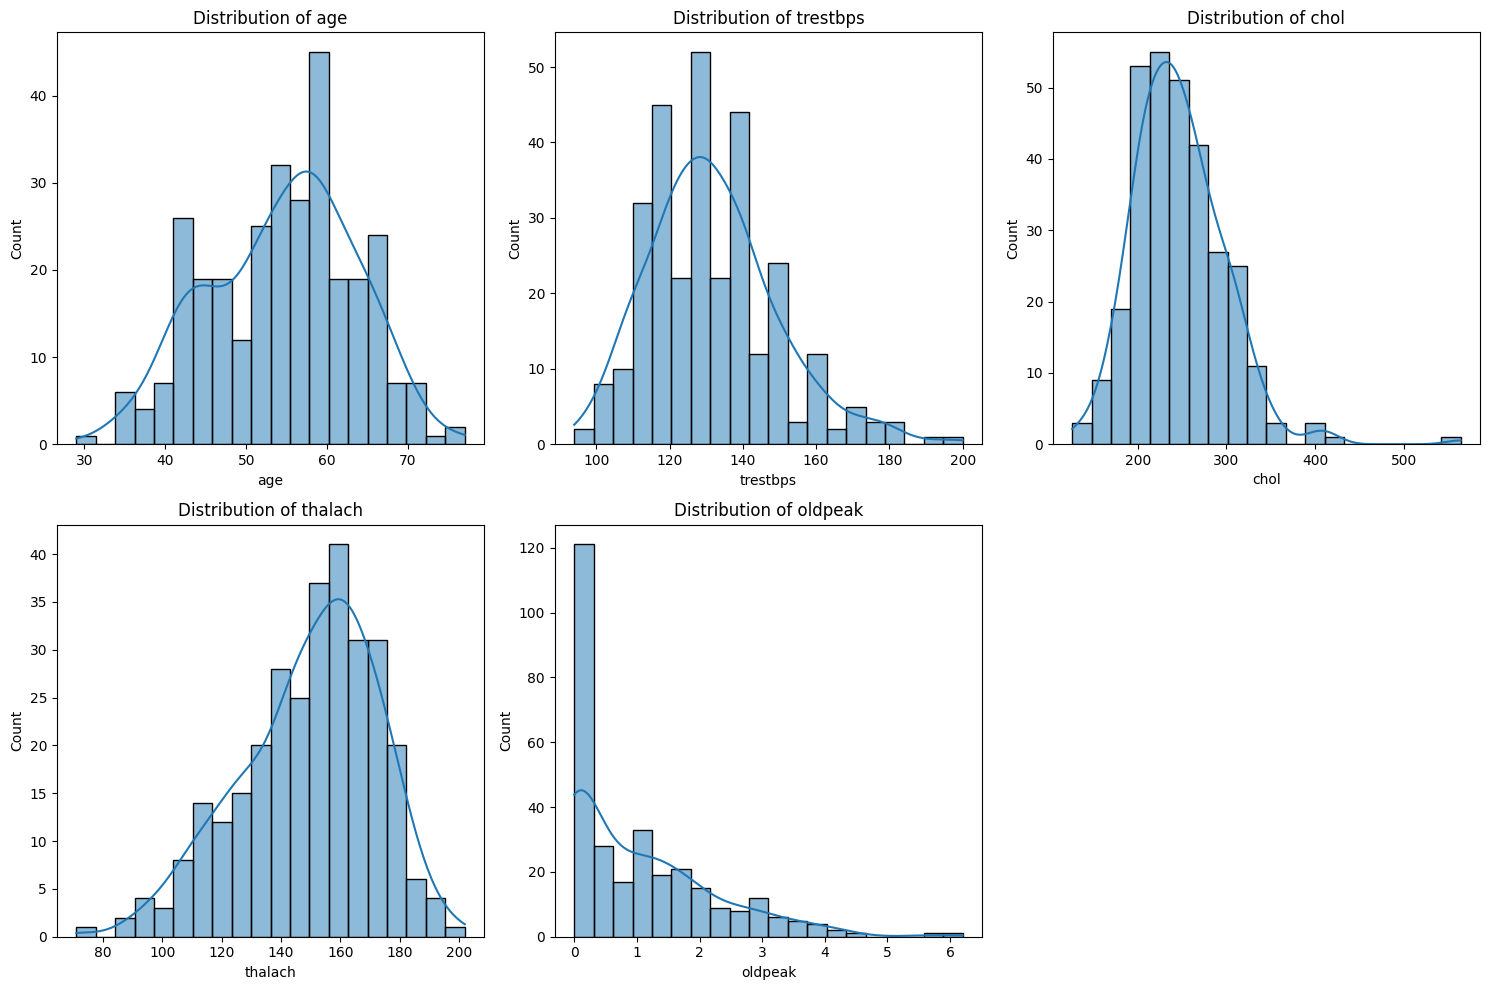

In [11]:
# Plot histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# **Countplots: Frequency of Categorical Features**

These plots are simple bar charts that show how many patients fall into each category for a given feature. They are perfect for understanding the composition of your dataset.

Count of sex: You have significantly more males (sex=1) than females (sex=0) in this dataset. This is an important imbalance to be aware of.

Count of cp (Chest Pain Type): The most common type is 0 (typical angina), while the other types are less frequent.

Count of fbs (Fasting Blood Sugar > 120 mg/dl): The vast majority of patients do not have high fasting blood sugar (fbs=0).

Count of exang (Exercise Induced Angina): More patients did not experience angina during exercise (exang=0) than those who did.



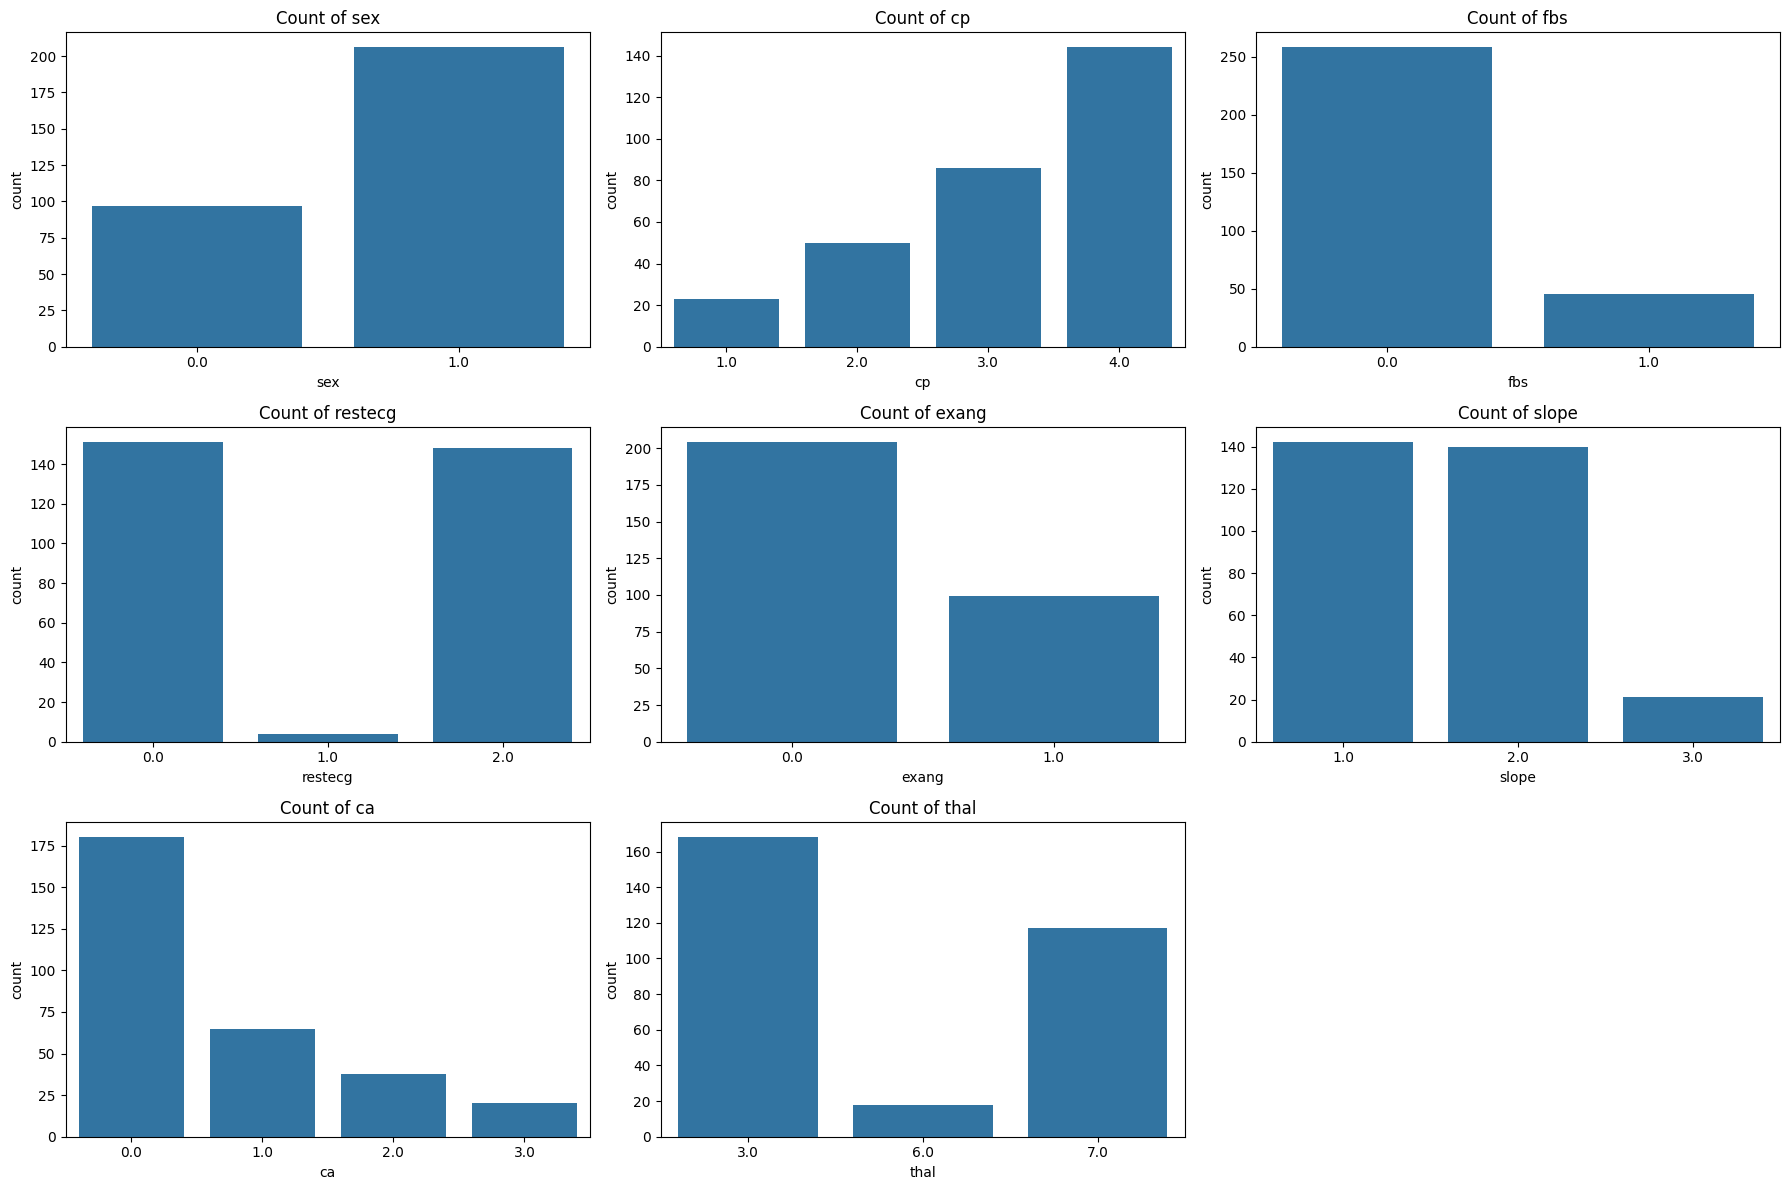

In [12]:
# Plot countplots for categorical features
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

# **Bivariate Analysis**

Overview: Here, we investigate the relationship between each feature and the target variable (heart disease).

Boxplots (sns.boxplot): For numerical features, we use boxplots to compare the distribution of the feature for patients with heart disease versus those without. If the boxes for the two groups are very different, it suggests the feature is a good predictor. For example, a boxplot might show that the median 'thalach' (max heart rate) is higher for people without heart disease.

Countplots with hue: For categorical features, we again use countplots, but this time we add hue='target'. This splits the bar for each category into two colors, representing the count of patients with and without heart disease. This immediately shows which categories are more associated with the disease.




--- Bivariate Analysis: Features vs. Heart Disease ---


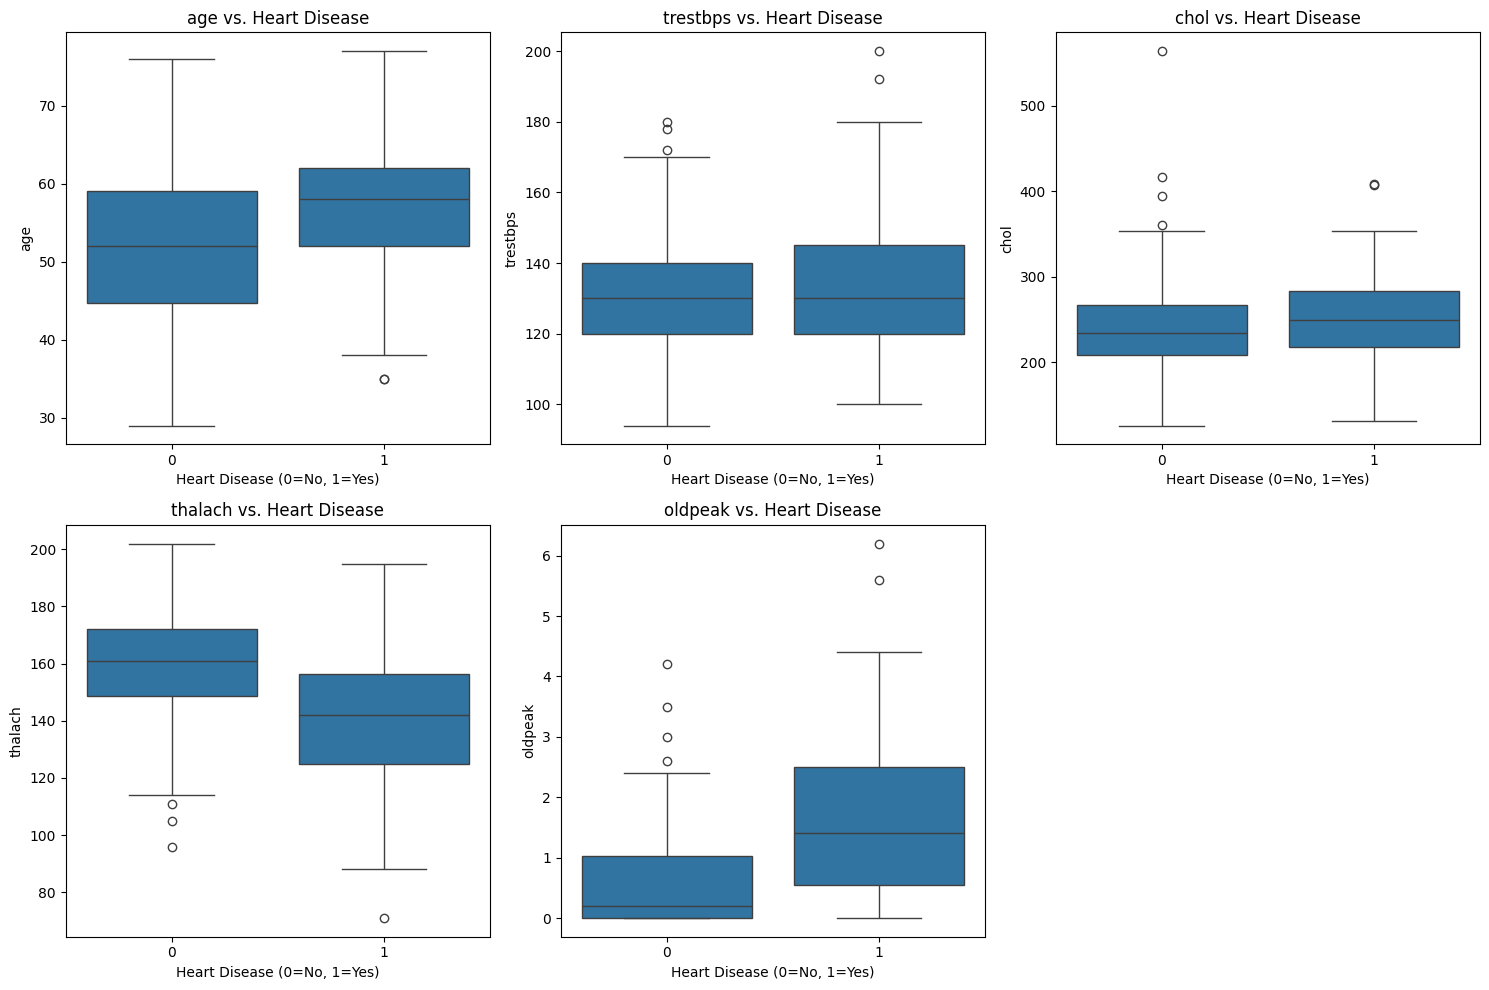

In [13]:
# 5. Bivariate Analysis
# ---
# Analyze the relationship between each feature and the target variable.

print("\n--- Bivariate Analysis: Features vs. Heart Disease ---")

# Numerical features vs. Target
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} vs. Heart Disease')
    plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.tight_layout()
plt.show()

# **Countplots with hue: Categorical Features vs. Heart Disease**

This is the categorical version of the boxplot. Each bar is split to show the proportion of patients with and without heart disease for each category.

cp (Chest Pain Type) vs. Heart Disease: This is very insightful. For patients with chest pain types 1, 2, and 3, the blue bar (No Disease) is larger than the orange bar (Disease). However, for cp=0 (typical angina), the orange bar is much larger. This tells you that other types of chest pain are less likely to be associated with heart disease in this dataset.

exang (Exercise Induced Angina) vs. Heart Disease: Patients with exercise-induced angina (exang=1) are much more likely to have heart disease (large orange bar).

sex vs. Heart Disease: While there are more males in the dataset, males also appear to have a higher proportion of heart disease compared to females.

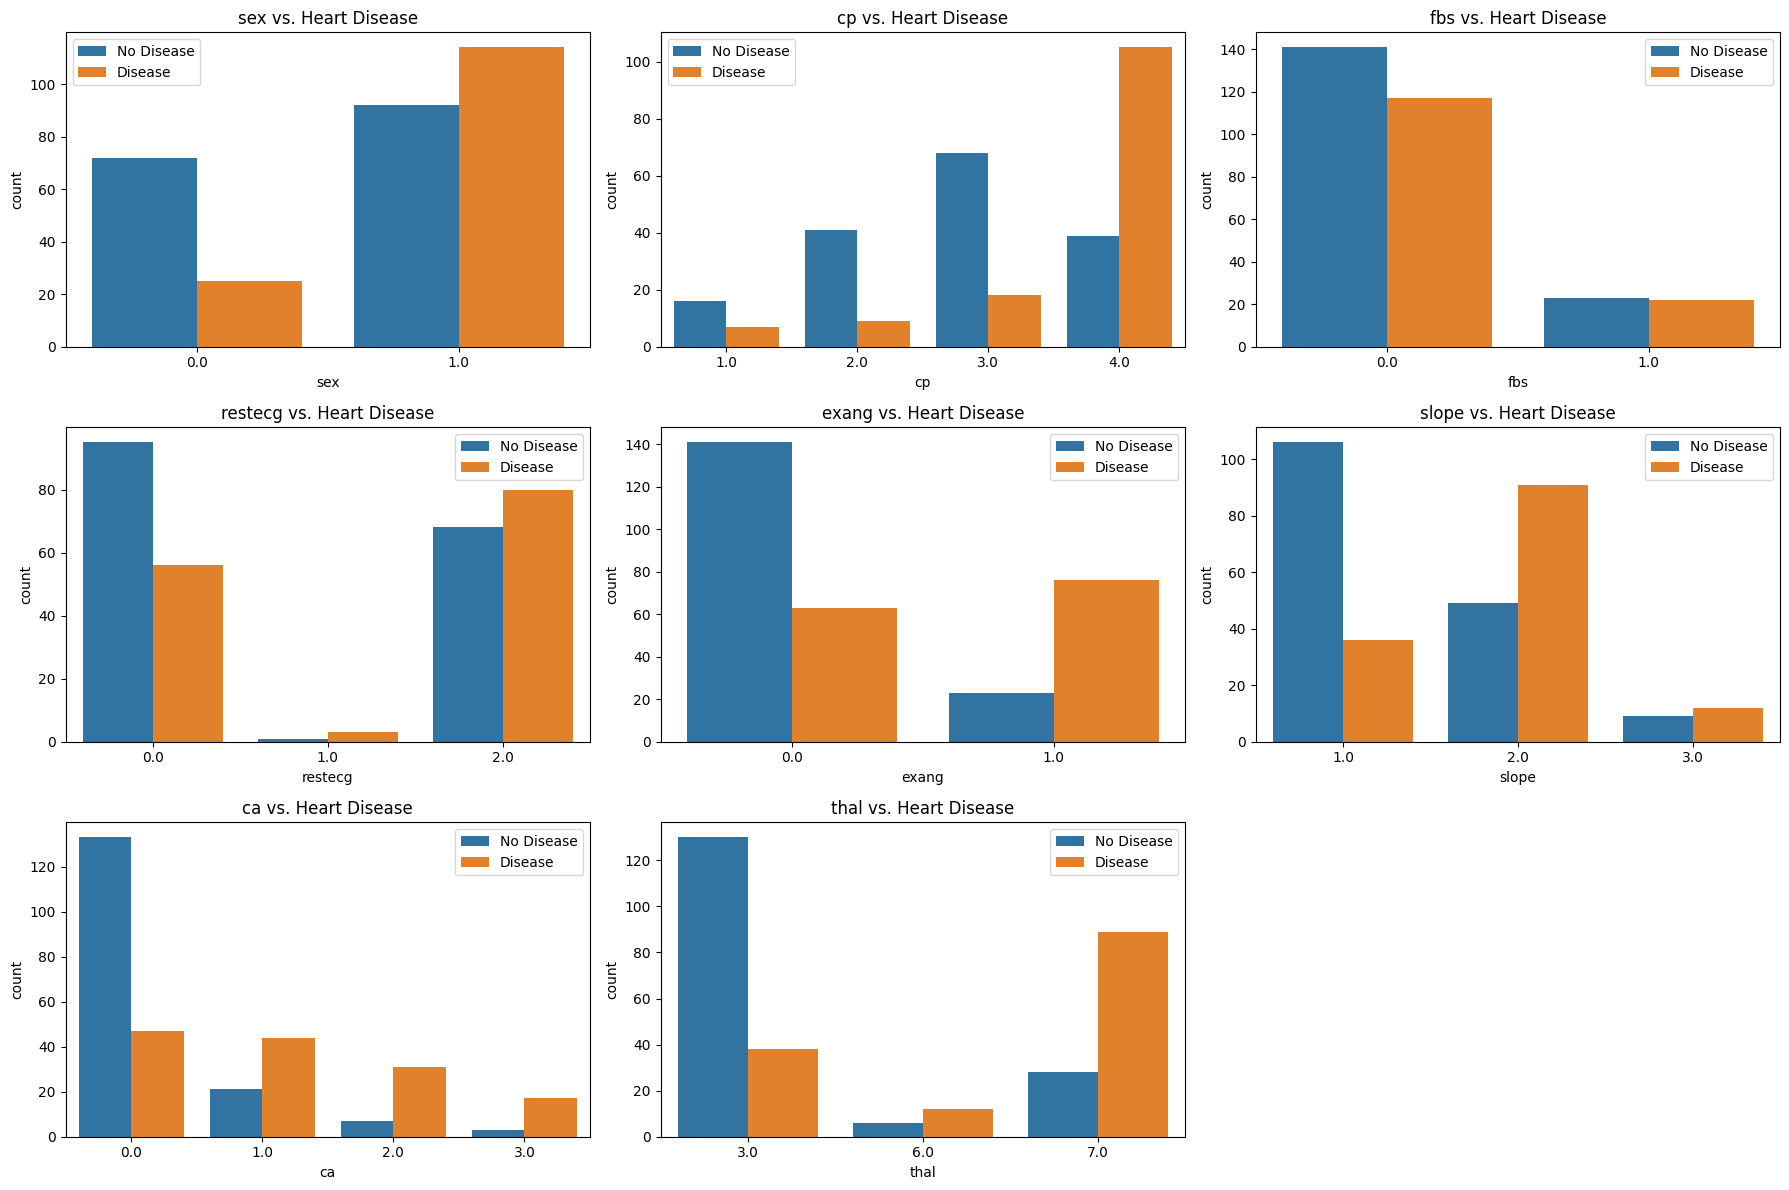

In [14]:
# Categorical features vs. Target
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'{col} vs. Heart Disease')
    plt.xlabel(col)
    plt.legend(['No Disease', 'Disease'])
plt.tight_layout()
plt.show()

# **Correlation Heatmap: Relationships Between Features**

The heatmap is a visual matrix that shows how every numerical feature relates to every other feature.

Colors: Warm colors (red/orange) mean a positive correlation (as one variable increases, the other tends to increase). Cool colors (blue) mean a negative correlation (as one increases, the other tends to decrease).

Key Findings from the 'target' row/column:

Negative Correlations: thalach has the strongest negative correlation with target (-0.42). This confirms what we saw in the boxplot: higher max heart rate is linked to a lower chance of disease.

Positive Correlations: oldpeak and ca have strong positive correlations with target. This also confirms our earlier findings: higher values in these features are linked to a higher chance of disease.

Other Correlations: You can see that age and thalach are negatively correlated (-0.4). This makes sense, as maximum heart rate tends to decrease with age.



--- Multivariate Analysis ---


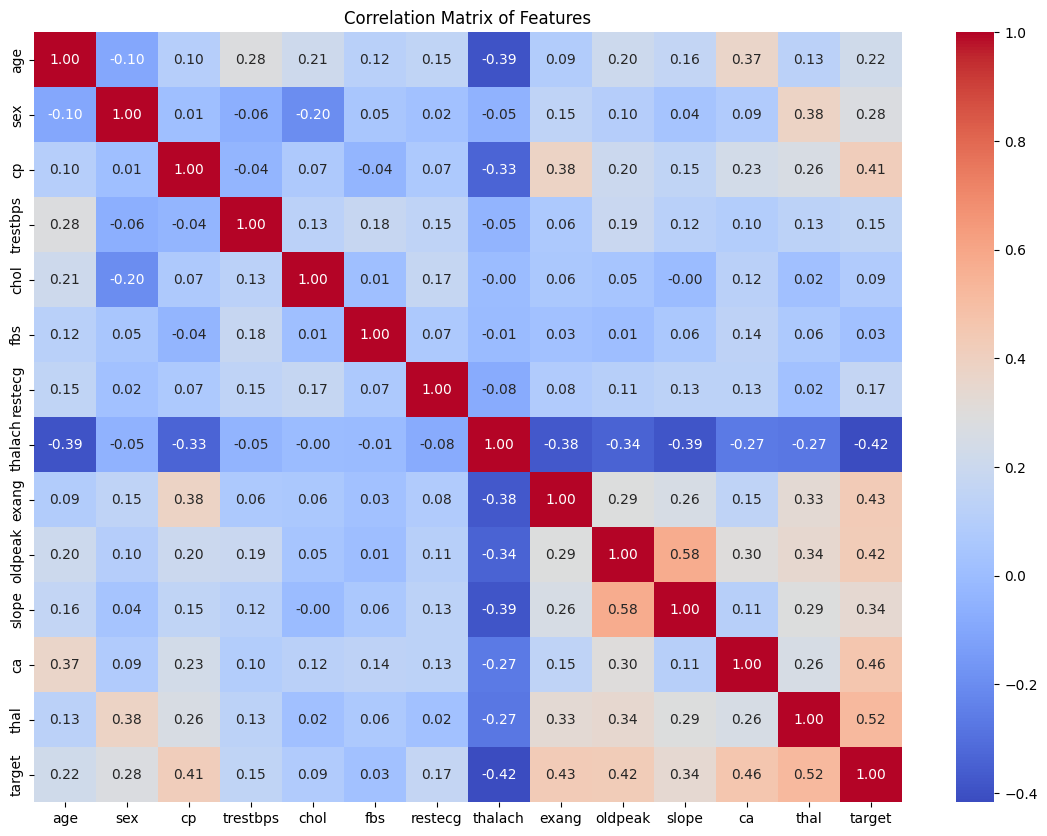

In [15]:
# 6. Multivariate Analysis
# ---
# Explore relationships among multiple features.

print("\n--- Multivariate Analysis ---")

# Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# **Pairplot: The Big Picture**

The pairplot is a fantastic summary tool. It shows scatter plots for every pair of features and histograms for each individual feature, all colored by the target variable.

What to look for: You are looking for scatter plots where the orange dots (target=1) and green dots (target=0) are well-separated. This separation indicates that the combination of those two features is a good predictor of heart disease.

Example: thalach vs. oldpeak (not shown, but can be inferred): If you were to plot these two, you would likely see a good separation. Patients with high thalach and low oldpeak (green dots) would cluster in one area, while patients with low thalach and high oldpeak (orange dots) would cluster in another. This visual confirmation is the goal of the pairplot.



Generating Pairplot (this may take a moment)...


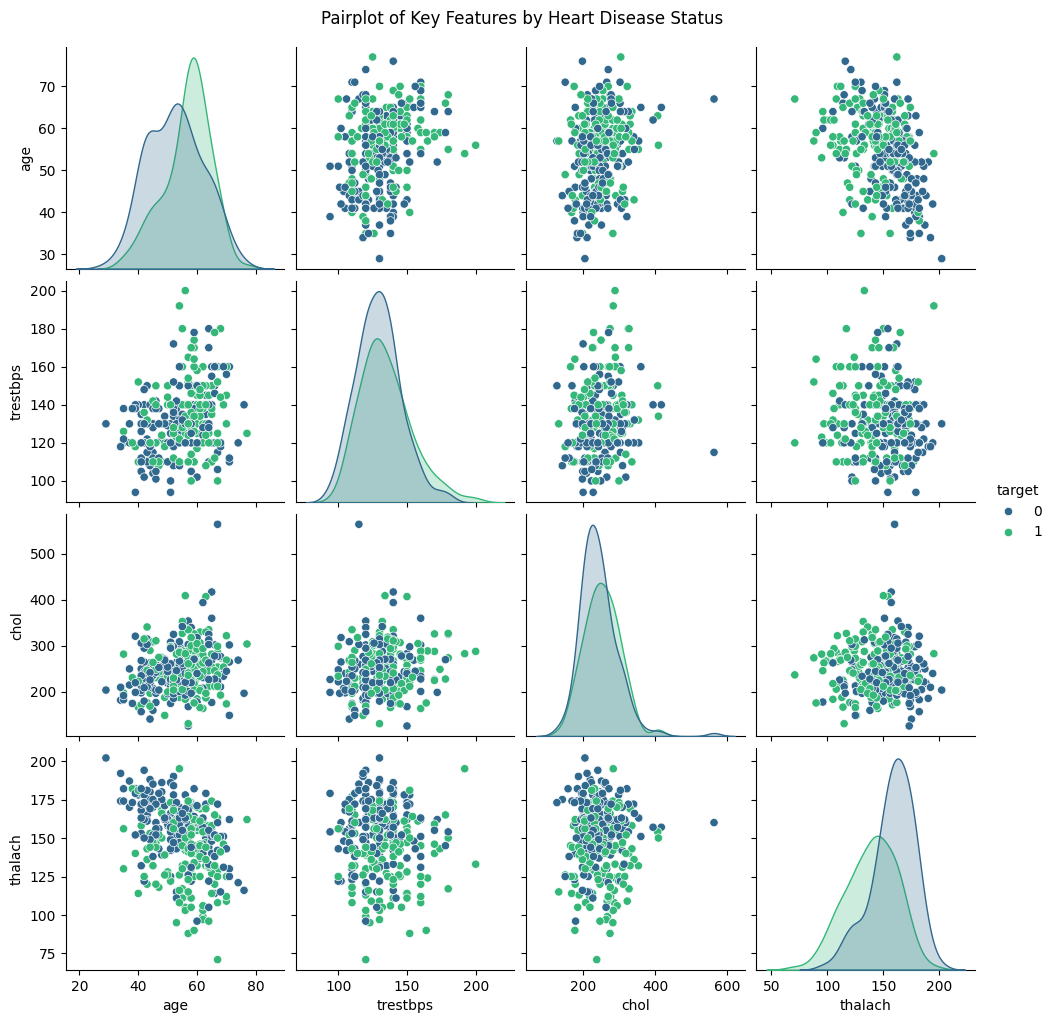

In [16]:
# Pairplot to visualize relationships between selected features, colored by target
print("\nGenerating Pairplot (this may take a moment)...")
selected_features_for_pairplot = ['age', 'trestbps', 'chol', 'thalach', 'target']
sns.pairplot(df[selected_features_for_pairplot], hue='target', palette='viridis')
plt.suptitle('Pairplot of Key Features by Heart Disease Status', y=1.02)
plt.show()

In [17]:
# 7. Summary of EDA Findings
# ---
print("\n--- EDA Summary ---")
print("""
1.  **Data Quality**: The dataset is clean after imputing a small number of missing values in 'ca' and 'thal' using the mode.
2.  **Distributions**:
    * Age has a relatively normal distribution.
    * Cholesterol ('chol') and resting blood pressure ('trestbps') have some high outliers.
    * The dataset has more male (sex=1) than female (sex=0) patients.
3.  **Key Relationships with Heart Disease**:
    * **Higher 'thalach'** (max heart rate) is associated with a lower chance of heart disease.
    * **Higher 'oldpeak'** (ST depression) is strongly associated with a higher chance of heart disease.
    * **Chest pain type ('cp')**: Non-anginal pain (cp=2) is less indicative of heart disease compared to other types.
    * **Exercise-induced angina ('exang')**: Patients without it (exang=0) are less likely to have heart disease.
    * **Number of major vessels ('ca')**: A lower number is associated with less disease.
4.  **Correlations**: 'thalach' and 'age' have a moderate negative correlation. 'oldpeak' and 'slope' are also correlated.
""")



--- EDA Summary ---

1.  **Data Quality**: The dataset is clean after imputing a small number of missing values in 'ca' and 'thal' using the mode.
2.  **Distributions**:
    * Age has a relatively normal distribution.
    * Cholesterol ('chol') and resting blood pressure ('trestbps') have some high outliers.
    * The dataset has more male (sex=1) than female (sex=0) patients.
3.  **Key Relationships with Heart Disease**:
    * **Higher 'thalach'** (max heart rate) is associated with a lower chance of heart disease.
    * **Higher 'oldpeak'** (ST depression) is strongly associated with a higher chance of heart disease.
    * **Chest pain type ('cp')**: Non-anginal pain (cp=2) is less indicative of heart disease compared to other types.
    * **Exercise-induced angina ('exang')**: Patients without it (exang=0) are less likely to have heart disease.
    * **Number of major vessels ('ca')**: A lower number is associated with less disease.
4.  **Correlations**: 'thalach' and 'age' have a 

In [18]:
# --- Save the Cleaned Dataset ---
# Define the filename for the output file
output_filename = 'cleaned_heart_disease_dataset.csv'

# Save the DataFrame to a CSV file
# index=False prevents pandas from writing the DataFrame index as a column
df.to_csv(output_filename, index=False)

print(f"Cleaned dataset successfully saved to '{output_filename}'")

Cleaned dataset successfully saved to 'cleaned_heart_disease_dataset.csv'


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Assume 'df' is your cleaned DataFrame from the EDA ---
# (i.e., missing values imputed and target_variable binarized)

# 1. One-Hot Encoding for categorical features
# We list all features that are categorical in nature, even if they are numeric.
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Use pd.get_dummies to convert them.
# drop_first=True helps avoid the "dummy variable trap" (multicollinearity)
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 2. Define Features (X) and Target (y)
X = df_processed.drop('target', axis=1)
y = df_processed['target']

# 3. Split data into Training and Testing sets
# We'll use 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 4. Scale the Data
# Scaling (Standardization) is very important for Logistic Regression.
# It ensures all features are on the same scale.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (242, 20)
X_test shape: (61, 20)


In [20]:
from sklearn.linear_model import LogisticRegression

# 1. Initialize the model
# random_state=42 ensures you get the same results every time you run it
log_model = LogisticRegression(random_state=42)

# 2. Train the model on the training data
log_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


--- Accuracy Score ---
The model's accuracy on the test set is: 83.61%

--- Classification Report ---
                precision    recall  f1-score   support

No Disease (0)       0.83      0.83      0.83        29
   Disease (1)       0.84      0.84      0.84        32

      accuracy                           0.84        61
     macro avg       0.84      0.84      0.84        61
  weighted avg       0.84      0.84      0.84        61



--- Confusion Matrix ---


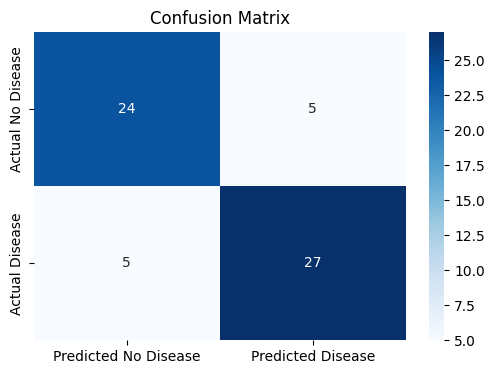

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Make predictions on the test set
y_pred = log_model.predict(X_test)

# 2. Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Accuracy Score ---")
print(f"The model's accuracy on the test set is: {accuracy * 100:.2f}%\n")

# 3. Print a detailed Classification Report
# This shows precision, recall, and f1-score for each class
print("--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['No Disease (0)', 'Disease (1)']))
print("\n")


# 4. Display a Confusion Matrix
print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Disease', 'Predicted Disease'],
            yticklabels=['Actual No Disease', 'Actual Disease'])
plt.title('Confusion Matrix')
plt.show()

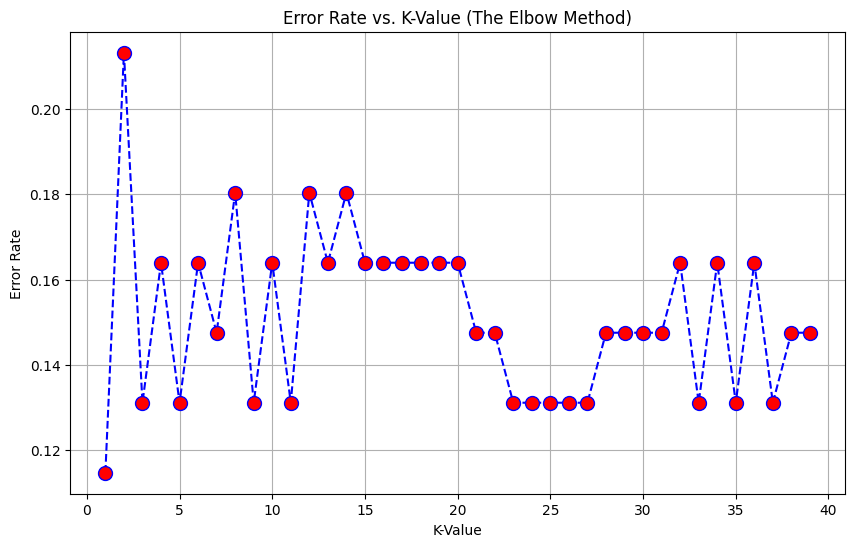

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# We will test k values from 1 to 40
# We need to use the scaled X_train and X_test from the previous step
error_rate = []

for k in range(1, 40):
    # Initialize the model
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the model
    knn.fit(X_train, y_train)
    # Make predictions on the test set
    pred_k = knn.predict(X_test)
    # Calculate the error rate (1 - accuracy) and append it
    error_rate.append(np.mean(pred_k != y_test))

# Plot the error rate vs. k value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Value (The Elbow Method)')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

In [23]:
# --- Replace '23' with the best k-value you found from your elbow plot ---
YOUR_BEST_K = 23

# 1. Initialize the final model with the optimal 'k'
knn_model = KNeighborsClassifier(n_neighbors=YOUR_BEST_K)

# 2. Train the model
knn_model.fit(X_train, y_train)

print(f"Final KNN model trained with k={YOUR_BEST_K}")

Final KNN model trained with k=23


--- KNN Accuracy Score ---
The KNN model's accuracy is: 86.89%

--- KNN Classification Report ---
                precision    recall  f1-score   support

No Disease (0)       0.82      0.93      0.87        29
   Disease (1)       0.93      0.81      0.87        32

      accuracy                           0.87        61
     macro avg       0.87      0.87      0.87        61
  weighted avg       0.88      0.87      0.87        61



--- KNN Confusion Matrix ---


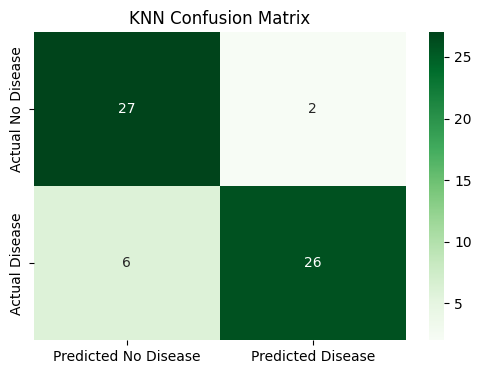

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# 1. Make predictions with the final model
y_pred_knn = knn_model.predict(X_test)

# 2. Calculate Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"--- KNN Accuracy Score ---")
print(f"The KNN model's accuracy is: {accuracy_knn * 100:.2f}%\n")

# 3. Print a detailed Classification Report
print("--- KNN Classification Report ---")
print(classification_report(y_test, y_pred_knn, target_names=['No Disease (0)', 'Disease (1)']))
print("\n")

# 4. Display a Confusion Matrix
print("--- KNN Confusion Matrix ---")
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted No Disease', 'Predicted Disease'],
            yticklabels=['Actual No Disease', 'Actual Disease'])
plt.title('KNN Confusion Matrix')
plt.show()

In [25]:
from sklearn.svm import SVC

# 1. Initialize the SVM classifier
# kernel='rbf' is excellent for non-linear problems
# probability=True allows us to get prediction probabilities for ROC curves
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# 2. Train the model on the training data
svm_model.fit(X_train, y_train)

print("Support Vector Machine (SVM) model trained successfully!")

Support Vector Machine (SVM) model trained successfully!


--- SVM Accuracy Score ---
The SVM model's accuracy is: 85.25%

--- SVM Classification Report ---
                precision    recall  f1-score   support

No Disease (0)       0.83      0.86      0.85        29
   Disease (1)       0.87      0.84      0.86        32

      accuracy                           0.85        61
     macro avg       0.85      0.85      0.85        61
  weighted avg       0.85      0.85      0.85        61



--- SVM Confusion Matrix ---


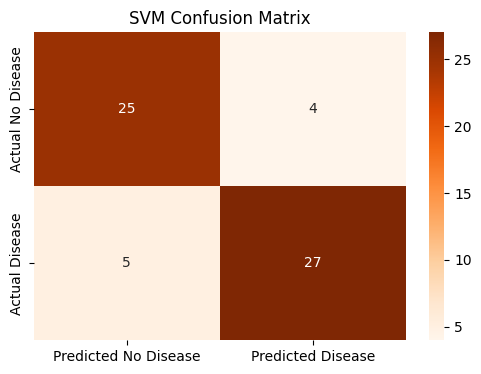

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# 2. Calculate Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"--- SVM Accuracy Score ---")
print(f"The SVM model's accuracy is: {accuracy_svm * 100:.2f}%\n")

# 3. Print a detailed Classification Report
print("--- SVM Classification Report ---")
print(classification_report(y_test, y_pred_svm, target_names=['No Disease (0)', 'Disease (1)']))
print("\n")

# 4. Display a Confusion Matrix
print("--- SVM Confusion Matrix ---")
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Predicted No Disease', 'Predicted Disease'],
            yticklabels=['Actual No Disease', 'Actual Disease'])
plt.title('SVM Confusion Matrix')
plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier

# 1. Initialize the Decision Tree classifier
# random_state=42 ensures the same tree is built every time
tree_model = DecisionTreeClassifier(random_state=42)

# 2. Train the model
tree_model.fit(X_train, y_train)

print("Decision Tree model trained successfully!")

Decision Tree model trained successfully!


--- Decision Tree Accuracy Score ---
The Decision Tree's accuracy is: 80.33%

--- Decision Tree Classification Report ---
                precision    recall  f1-score   support

No Disease (0)       0.81      0.76      0.79        29
   Disease (1)       0.79      0.84      0.82        32

      accuracy                           0.80        61
     macro avg       0.80      0.80      0.80        61
  weighted avg       0.80      0.80      0.80        61



--- Decision Tree Confusion Matrix ---


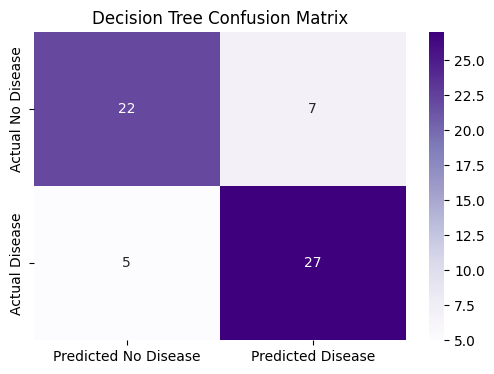

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# 2. Calculate Accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"--- Decision Tree Accuracy Score ---")
print(f"The Decision Tree's accuracy is: {accuracy_tree * 100:.2f}%\n")

# 3. Print a detailed Classification Report
print("--- Decision Tree Classification Report ---")
print(classification_report(y_test, y_pred_tree, target_names=['No Disease (0)', 'Disease (1)']))
print("\n")

# 4. Display a Confusion Matrix
print("--- Decision Tree Confusion Matrix ---")
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicted No Disease', 'Predicted Disease'],
            yticklabels=['Actual No Disease', 'Actual Disease'])
plt.title('Decision Tree Confusion Matrix')
plt.show()

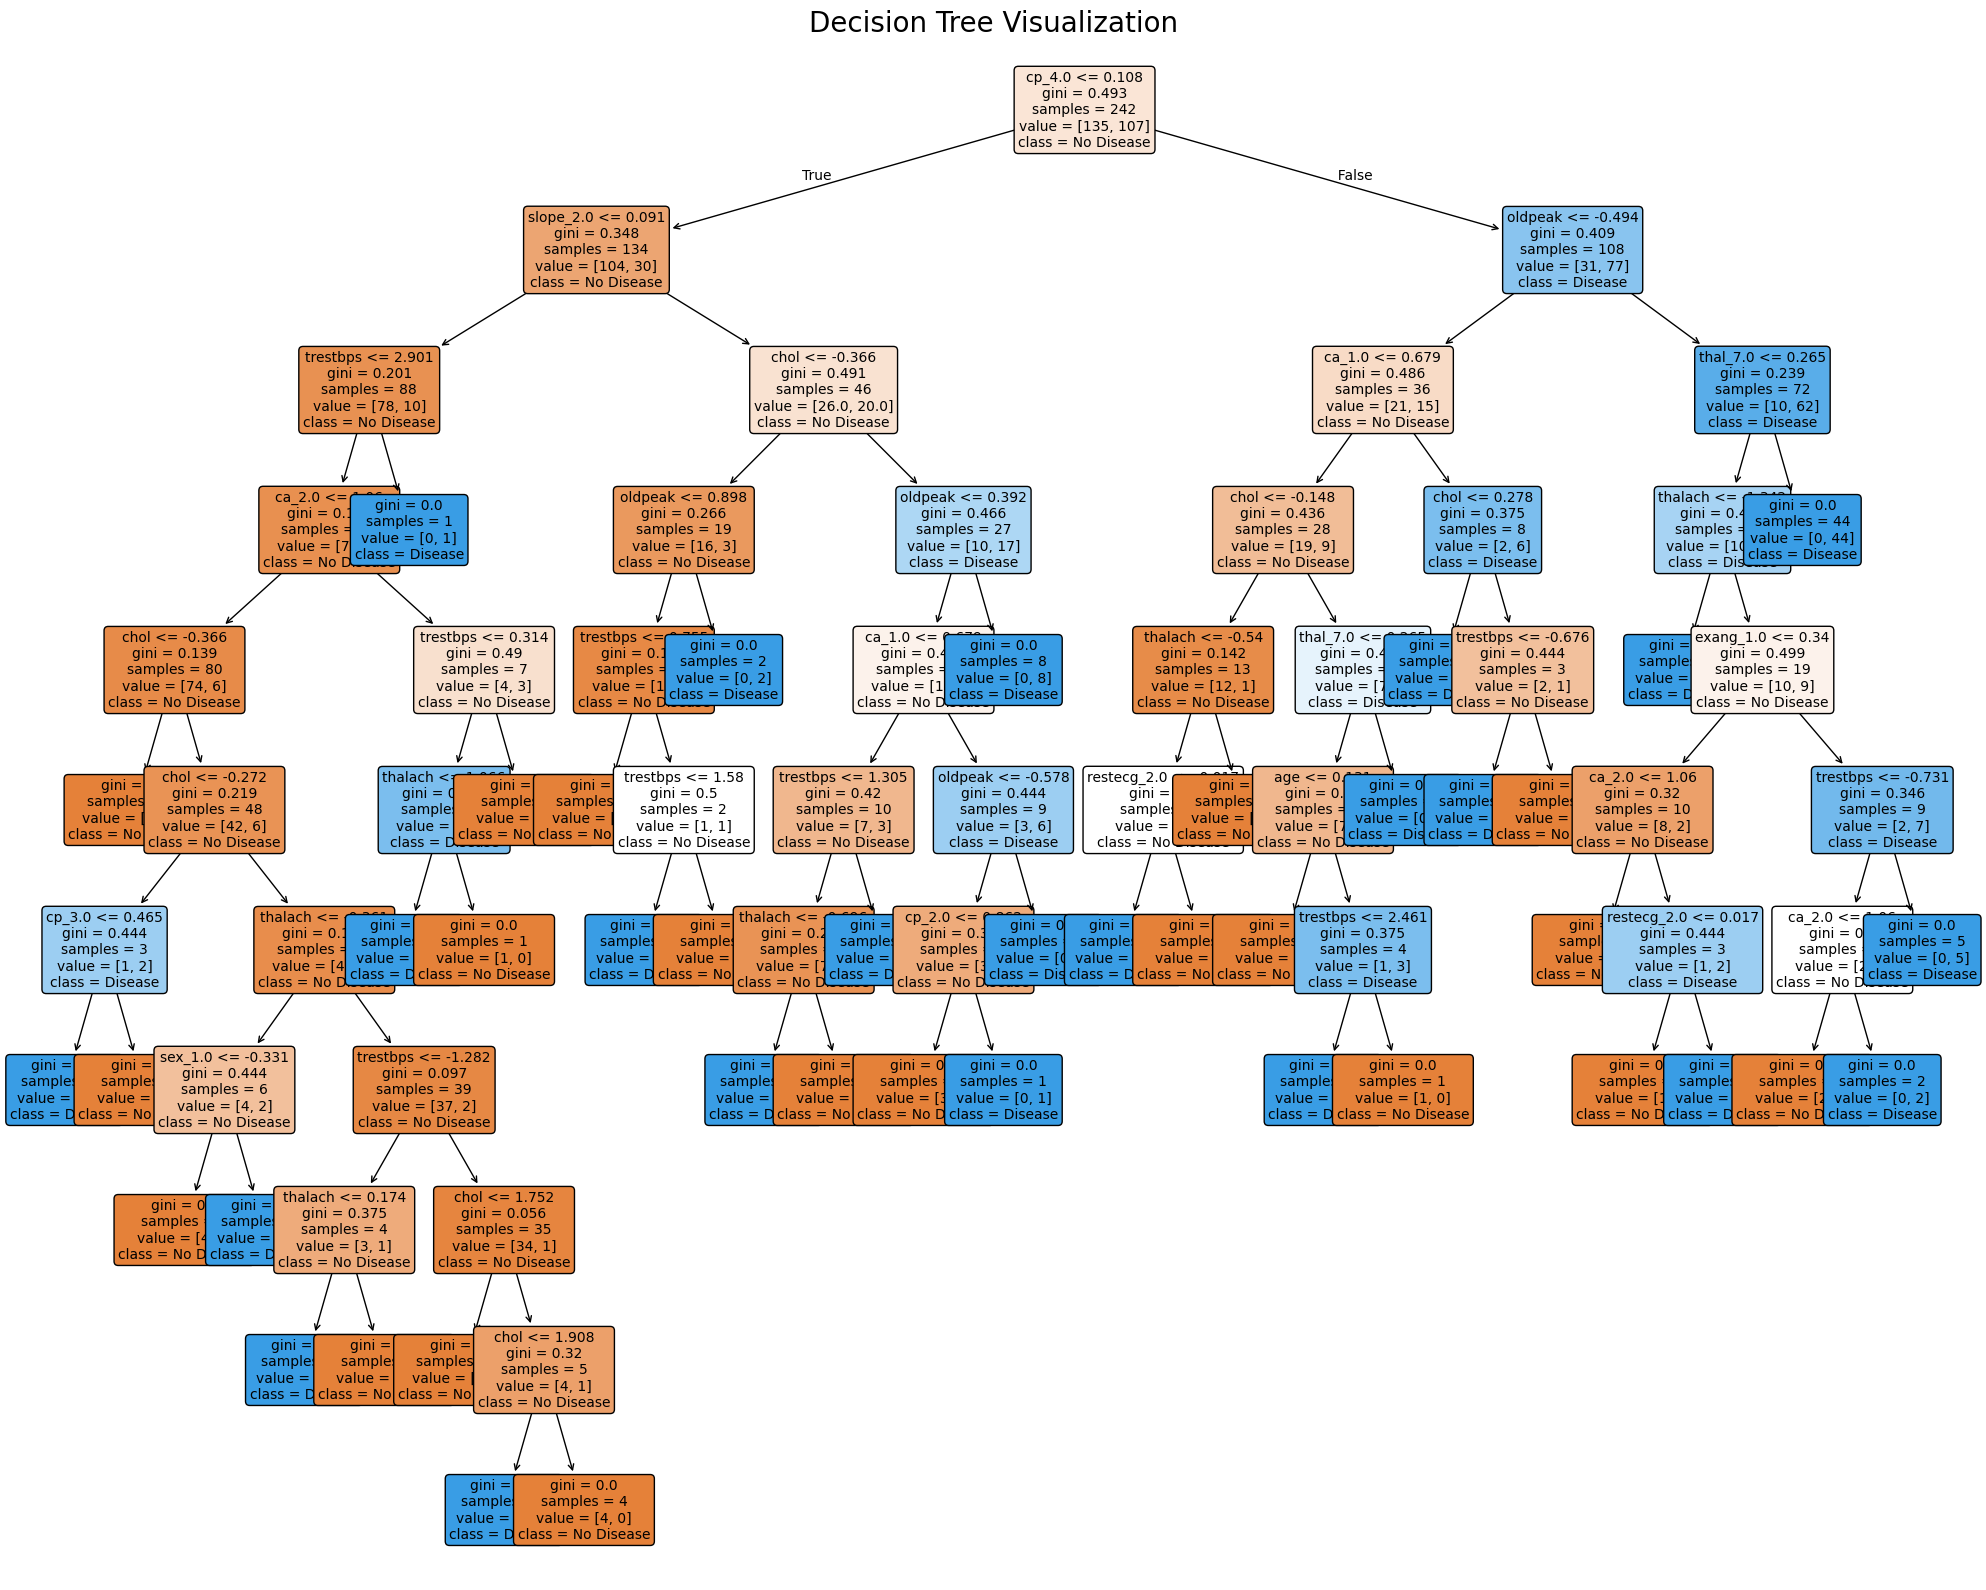

In [29]:
from sklearn.tree import plot_tree

# Get the feature names from the processed (dummied) dataframe
feature_names = X.columns
# Define the class names
class_names = ['No Disease', 'Disease']

plt.figure(figsize=(25, 20))  # Set a large figure size to see the details
plot_tree(tree_model,
          filled=True,
          feature_names=feature_names,
          class_names=class_names,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Visualization', fontsize=20)
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the Random Forest classifier
# n_estimators=100 builds a forest of 100 individual trees
# random_state=42 ensures our results are reproducible
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the model
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


--- Random Forest Accuracy Score ---
The Random Forest's accuracy is: 86.89%

--- Random Forest Classification Report ---
                precision    recall  f1-score   support

No Disease (0)       0.84      0.90      0.87        29
   Disease (1)       0.90      0.84      0.87        32

      accuracy                           0.87        61
     macro avg       0.87      0.87      0.87        61
  weighted avg       0.87      0.87      0.87        61



--- Random Forest Confusion Matrix ---


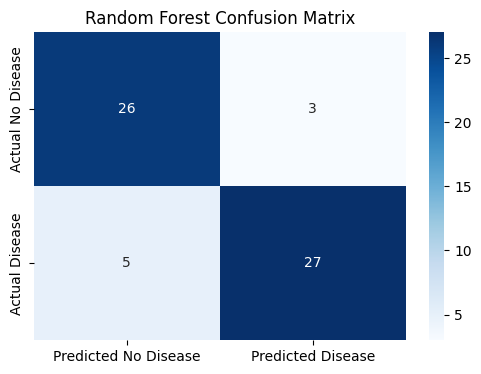

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# 2. Calculate Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"--- Random Forest Accuracy Score ---")
print(f"The Random Forest's accuracy is: {accuracy_rf * 100:.2f}%\n")

# 3. Print a detailed Classification Report
print("--- Random Forest Classification Report ---")
print(classification_report(y_test, y_pred_rf, target_names=['No Disease (0)', 'Disease (1)']))
print("\n")

# 4. Display a Confusion Matrix
print("--- Random Forest Confusion Matrix ---")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Disease', 'Predicted Disease'],
            yticklabels=['Actual No Disease', 'Actual Disease'])
plt.title('Random Forest Confusion Matrix')
plt.show()

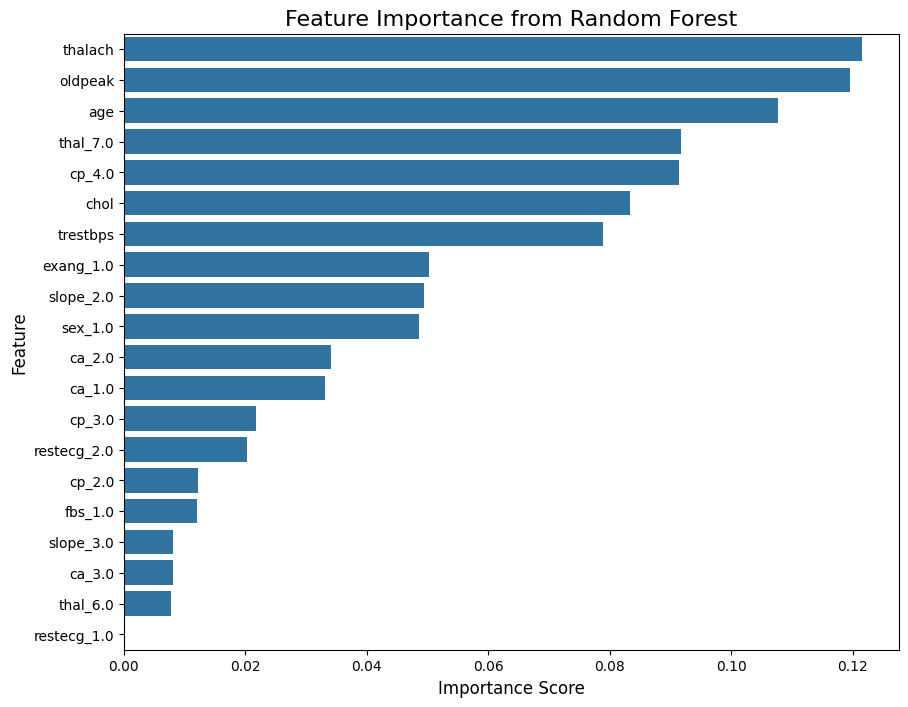

In [32]:
import pandas as pd

# Get the feature names from the processed (dummied) dataframe
feature_names = X.columns

# Get the feature importances from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame to view them clearly
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_sorted)
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

--- XGBoost Accuracy Score ---
The XGBoost's accuracy is: 81.97%

--- XGBoost Classification Report ---
                precision    recall  f1-score   support

No Disease (0)       0.78      0.86      0.82        29
   Disease (1)       0.86      0.78      0.82        32

      accuracy                           0.82        61
     macro avg       0.82      0.82      0.82        61
  weighted avg       0.82      0.82      0.82        61



--- XGBoost Confusion Matrix ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:46:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


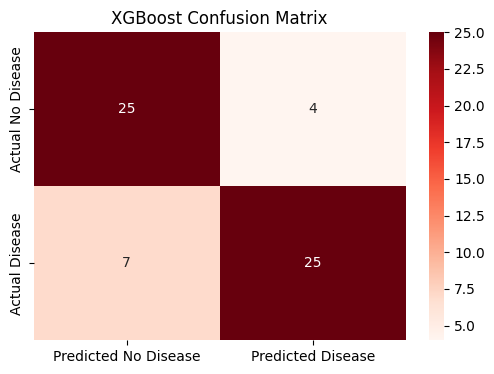

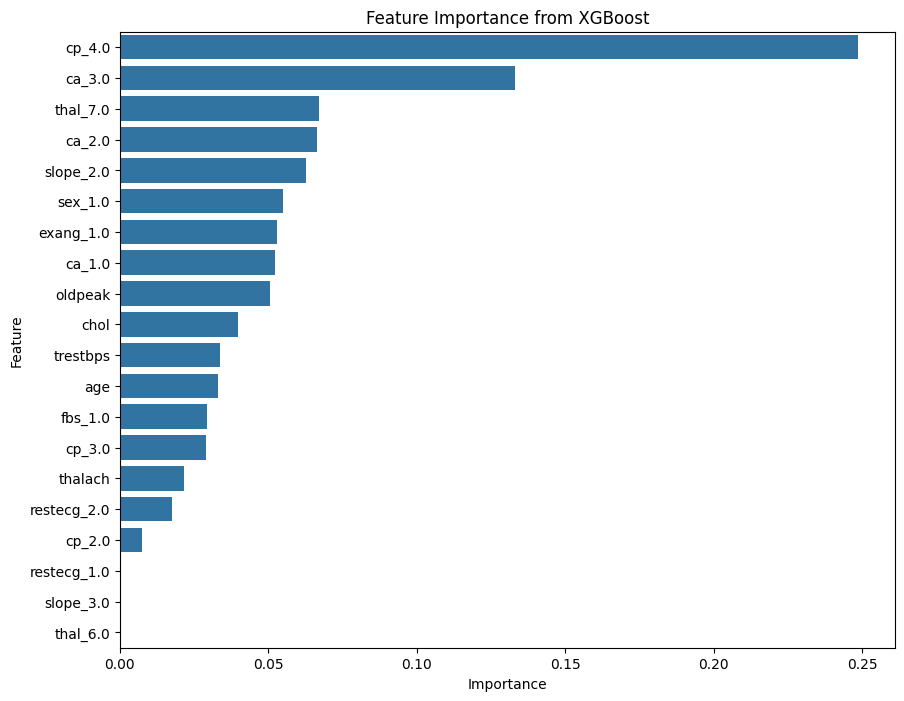

In [33]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Initialize the XGBoost classifier
# use_label_encoder=False and eval_metric='logloss' are often added to suppress warnings
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# 2. Train the model
xgb_model.fit(X_train, y_train)

# 3. Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# 4. Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"--- XGBoost Accuracy Score ---")
print(f"The XGBoost's accuracy is: {accuracy_xgb * 100:.2f}%\n")

print("--- XGBoost Classification Report ---")
print(classification_report(y_test, y_pred_xgb, target_names=['No Disease (0)', 'Disease (1)']))
print("\n")

print("--- XGBoost Confusion Matrix ---")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Predicted No Disease', 'Predicted Disease'],
            yticklabels=['Actual No Disease', 'Actual Disease'])
plt.title('XGBoost Confusion Matrix')
plt.show()

# 5. Feature Importance
feature_names = X.columns
importances = xgb_model.feature_importances_
xgb_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df)
plt.title('Feature Importance from XGBoost')
plt.show()

[LightGBM] [Info] Number of positive: 107, number of negative: 135
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.442149 -> initscore=-0.232446
[LightGBM] [Info] Start training from score -0.232446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


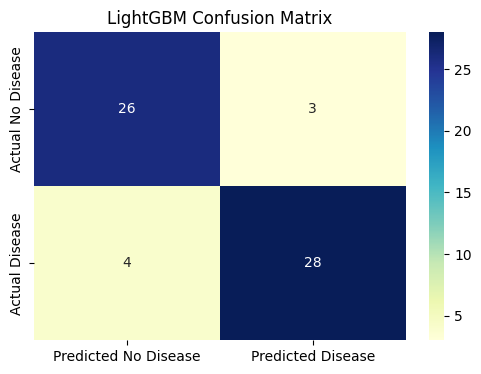

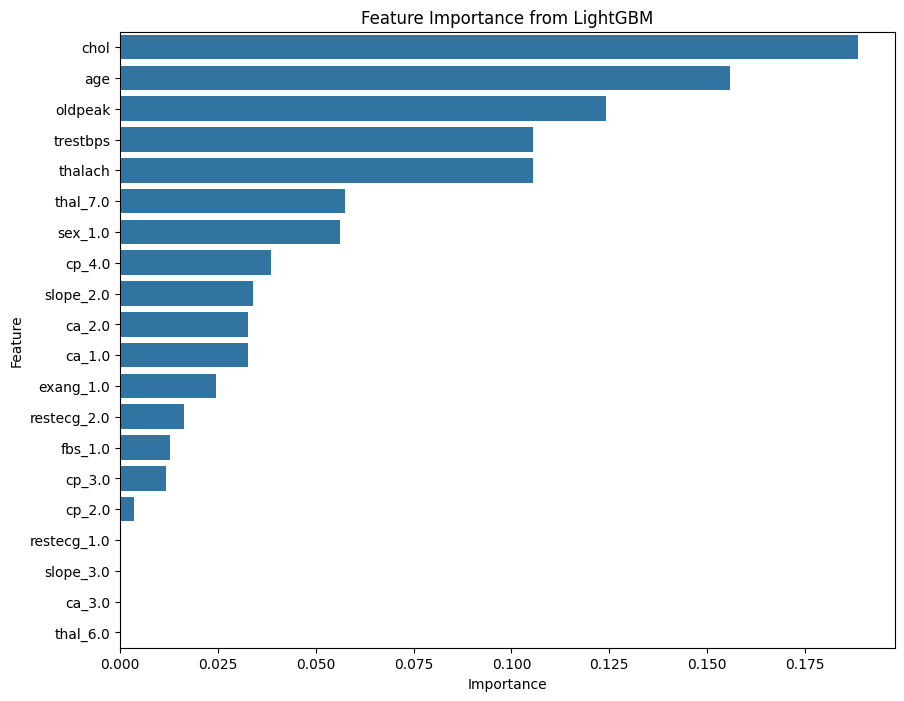

In [34]:
import lightgbm as lgb

# 1. Initialize the LightGBM classifier
lgbm_model = lgb.LGBMClassifier(random_state=42)

# 2. Train the model
lgbm_model.fit(X_train, y_train)

# 3. Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# 4. Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"--- LightGBM Accuracy Score ---")
print(f"The LightGBM's accuracy is: {accuracy_lgbm * 100:.2f}%\n")

print("--- LightGBM Classification Report ---")
print(classification_report(y_test, y_pred_lgbm, target_names=['No Disease (0)', 'Disease (1)']))
print("\n")

print("--- LightGBM Confusion Matrix ---")
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted No Disease', 'Predicted Disease'],
            yticklabels=['Actual No Disease', 'Actual Disease'])
plt.title('LightGBM Confusion Matrix')
plt.show()

# 5. Feature Importance
importances_lgbm = lgbm_model.feature_importances_
lgbm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances_lgbm})
# LightGBM importance is a count, let's normalize it to sum to 1
lgbm_importance_df['Importance'] = lgbm_importance_df['Importance'] / lgbm_importance_df['Importance'].sum()
lgbm_importance_df = lgbm_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=lgbm_importance_df)
plt.title('Feature Importance from LightGBM')
plt.show()

In [35]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00


--- CatBoost Accuracy Score ---
The CatBoost's accuracy is: 88.52%

--- CatBoost Classification Report ---
                precision    recall  f1-score   support

No Disease (0)       0.87      0.90      0.88        29
   Disease (1)       0.90      0.88      0.89        32

      accuracy                           0.89        61
     macro avg       0.88      0.89      0.89        61
  weighted avg       0.89      0.89      0.89        61



--- CatBoost Confusion Matrix ---


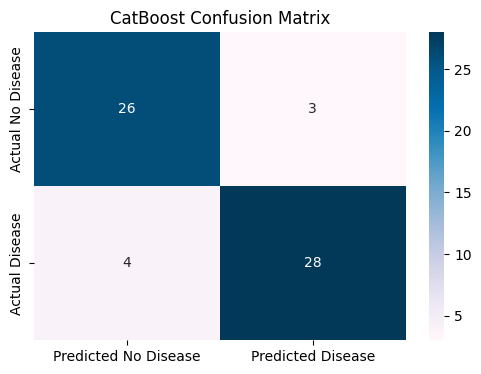

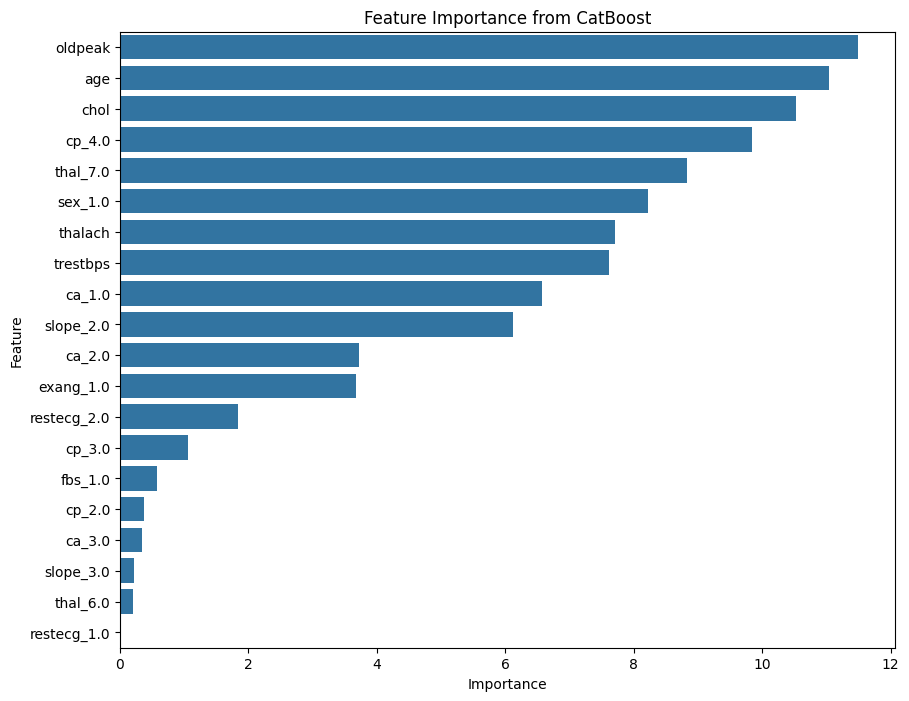

In [36]:
import catboost as cb

# 1. Initialize the CatBoost classifier
# verbose=0 suppresses the training output for a cleaner notebook
cat_model = cb.CatBoostClassifier(random_state=42, verbose=0)

# 2. Train the model
cat_model.fit(X_train, y_train)

# 3. Make predictions
y_pred_cat = cat_model.predict(X_test)

# 4. Evaluate the model
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f"--- CatBoost Accuracy Score ---")
print(f"The CatBoost's accuracy is: {accuracy_cat * 100:.2f}%\n")

print("--- CatBoost Classification Report ---")
print(classification_report(y_test, y_pred_cat, target_names=['No Disease (0)', 'Disease (1)']))
print("\n")

print("--- CatBoost Confusion Matrix ---")
cm_cat = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='PuBu',
            xticklabels=['Predicted No Disease', 'Predicted Disease'],
            yticklabels=['Actual No Disease', 'Actual Disease'])
plt.title('CatBoost Confusion Matrix')
plt.show()

# 5. Feature Importance
importances_cat = cat_model.get_feature_importance()
cat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances_cat})
cat_importance_df = cat_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=cat_importance_df)
plt.title('Feature Importance from CatBoost')
plt.show()

In [37]:
from sklearn.naive_bayes import GaussianNB

# 1. Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# 2. Train the model
nb_model.fit(X_train, y_train)

print("Gaussian Naive Bayes (GNB) model trained successfully!")

Gaussian Naive Bayes (GNB) model trained successfully!


--- Naive Bayes Accuracy Score ---
The Naive Bayes's accuracy is: 83.61%

--- Naive Bayes Classification Report ---
                precision    recall  f1-score   support

No Disease (0)       0.79      0.90      0.84        29
   Disease (1)       0.89      0.78      0.83        32

      accuracy                           0.84        61
     macro avg       0.84      0.84      0.84        61
  weighted avg       0.84      0.84      0.84        61



--- Naive Bayes Confusion Matrix ---


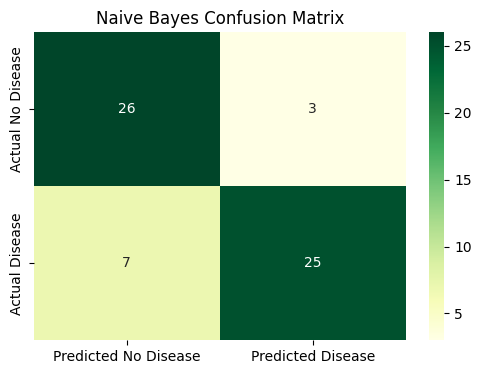

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# 2. Calculate Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"--- Naive Bayes Accuracy Score ---")
print(f"The Naive Bayes's accuracy is: {accuracy_nb * 100:.2f}%\n")

# 3. Print a detailed Classification Report
print("--- Naive Bayes Classification Report ---")
print(classification_report(y_test, y_pred_nb, target_names=['No Disease (0)', 'Disease (1)']))
print("\n")

# 4. Display a Confusion Matrix
print("--- Naive Bayes Confusion Matrix ---")
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='YlGn',
            xticklabels=['Predicted No Disease', 'Predicted Disease'],
            yticklabels=['Actual No Disease', 'Actual Disease'])
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [39]:
from sklearn.neural_network import MLPClassifier

# 1. Initialize the MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50),
                          max_iter=1000,
                          random_state=42,
                          early_stopping=True,  # Prevents overfitting
                          n_iter_no_change=15)  # How many epochs to wait for improvement

# 2. Train the model
# This may take a few seconds, as it's more complex than the other models
mlp_model.fit(X_train, y_train)

print("MLP (Neural Network) model trained successfully!")

MLP (Neural Network) model trained successfully!


--- MLP Accuracy Score ---
The MLP's accuracy is: 80.33%

--- MLP Classification Report ---
                precision    recall  f1-score   support

No Disease (0)       0.77      0.83      0.80        29
   Disease (1)       0.83      0.78      0.81        32

      accuracy                           0.80        61
     macro avg       0.80      0.80      0.80        61
  weighted avg       0.81      0.80      0.80        61



--- MLP Confusion Matrix ---


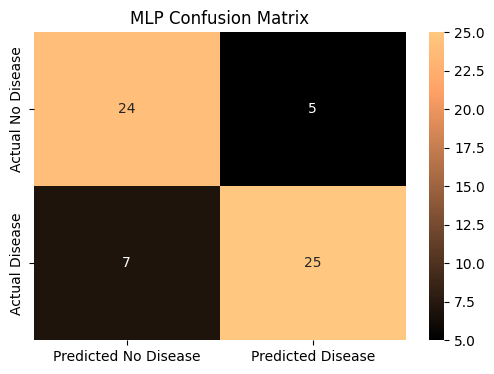

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)

# 2. Calculate Accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"--- MLP Accuracy Score ---")
print(f"The MLP's accuracy is: {accuracy_mlp * 100:.2f}%\n")

# 3. Print a detailed Classification Report
print("--- MLP Classification Report ---")
print(classification_report(y_test, y_pred_mlp, target_names=['No Disease (0)', 'Disease (1)']))
print("\n")

# 4. Display a Confusion Matrix
print("--- MLP Confusion Matrix ---")
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='copper',
            xticklabels=['Predicted No Disease', 'Predicted Disease'],
            yticklabels=['Actual No Disease', 'Actual Disease'])
plt.title('MLP Confusion Matrix')
plt.show()

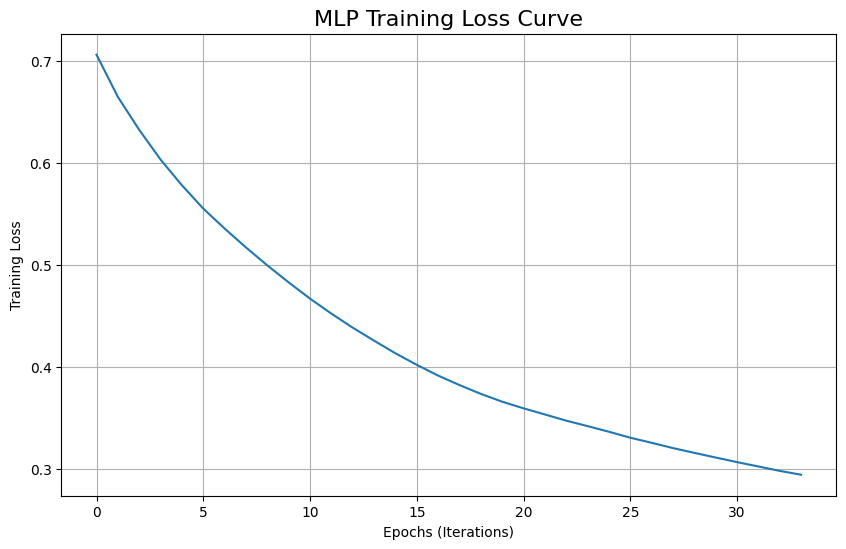

In [41]:
import matplotlib.pyplot as plt

# The model stores its loss history in the .loss_curve_ attribute
plt.figure(figsize=(10, 6))
plt.plot(mlp_model.loss_curve_)
plt.title('MLP Training Loss Curve', fontsize=16)
plt.xlabel('Epochs (Iterations)')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

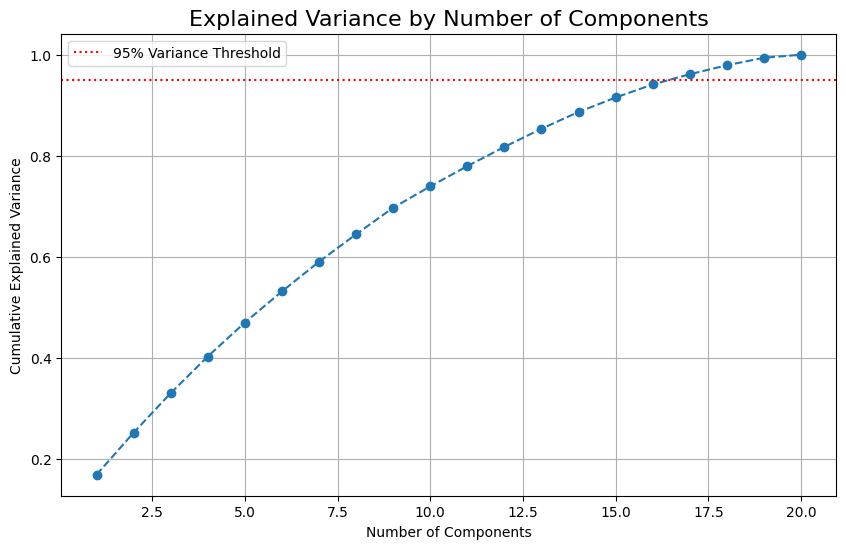

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. Initialize PCA and fit it to our training data
# We don't set n_components, so it will find all 22
pca_full = PCA()
pca_full.fit(X_train)

# 2. Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# 3. Plot the "Scree Plot"
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Number of Components', fontsize=16)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
# Let's add a line for 95% variance
plt.axhline(y=0.95, color='r', linestyle=':', label='95% Variance Threshold')
plt.legend()
plt.show()

Original data shape: (242, 20)
PCA-transformed data shape: (242, 2)

Classifier trained on 2 Principal Components!
--- Accuracy (PCA=2) ---
Accuracy on 2-component PCA data: 81.97%

--- Classification Report (PCA=2) ---
                precision    recall  f1-score   support

No Disease (0)       0.78      0.86      0.82        29
   Disease (1)       0.86      0.78      0.82        32

      accuracy                           0.82        61
     macro avg       0.82      0.82      0.82        61
  weighted avg       0.82      0.82      0.82        61



--- Confusion Matrix (PCA=2) ---


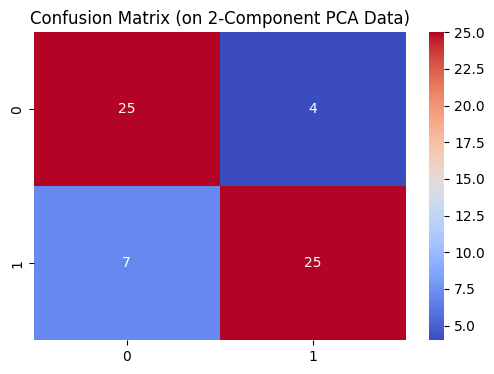

In [43]:
# 1. Apply PCA with 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Original data shape: {X_train.shape}")
print(f"PCA-transformed data shape: {X_train_pca.shape}")

# 2. Train a new classifier on the PCA data
from sklearn.linear_model import LogisticRegression

# We'll use a new Logistic Regression model
lr_model_pca = LogisticRegression(random_state=42)
lr_model_pca.fit(X_train_pca, y_train)

print("\nClassifier trained on 2 Principal Components!")

# 3. Evaluate the new model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

y_pred_pca = lr_model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"--- Accuracy (PCA=2) ---")
print(f"Accuracy on 2-component PCA data: {accuracy_pca * 100:.2f}%\n")

print("--- Classification Report (PCA=2) ---")
print(classification_report(y_test, y_pred_pca, target_names=['No Disease (0)', 'Disease (1)']))
print("\n")

print("--- Confusion Matrix (PCA=2) ---")
cm_pca = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix (on 2-Component PCA Data)')
plt.show()

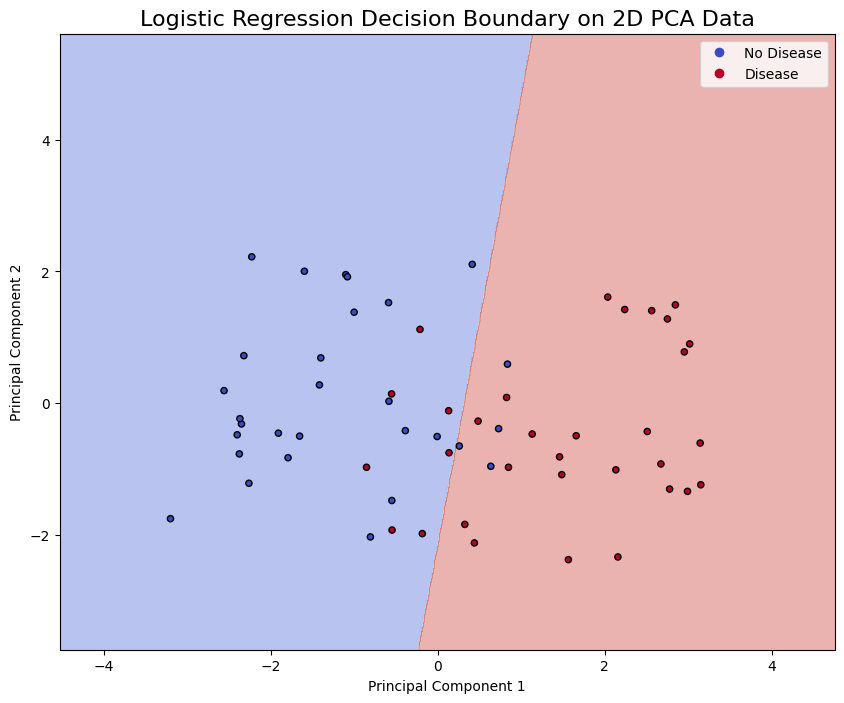

In [44]:
import numpy as np

# Create a meshgrid to plot the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Get predictions for the whole grid
Z = lr_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour (the decision boundary)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

# Plot the scatter (our test data)
# We plot the *test* set to see how it generalizes
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, s=20, edgecolor='k', cmap='coolwarm')
plt.title('Logistic Regression Decision Boundary on 2D PCA Data', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['No Disease', 'Disease'])
plt.show()

In [45]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Initialize our base models
# We use the parameters from our previous steps
clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = SVC(kernel='rbf', probability=True, random_state=42) # probability=True is CRITICAL for soft voting

# 2. Create the Voting Classifier (Hard Voting)
# We pass a list of tuples: (name, model)
voting_clf_hard = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('svm', clf3)],
    voting='hard'  # 'hard' = majority rule
)

# 3. Train the Hard Voting classifier
voting_clf_hard.fit(X_train, y_train)

# 4. Evaluate the Hard Voting classifier
y_pred_hard = voting_clf_hard.predict(X_test)
accuracy_hard = accuracy_score(y_test, y_pred_hard)
print(f"--- Hard Voting Classifier ---")
print(f"Accuracy: {accuracy_hard * 100:.2f}%\n")
print(classification_report(y_test, y_pred_hard, target_names=['No Disease (0)', 'Disease (1)']))
print("\n")


# 5. Create the Voting Classifier (Soft Voting)
voting_clf_soft = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('svm', clf3)],
    voting='soft'  # 'soft' = average probabilities
)

# 6. Train the Soft Voting classifier
voting_clf_soft.fit(X_train, y_train)

# 7. Evaluate the Soft Voting classifier
y_pred_soft = voting_clf_soft.predict(X_test)
accuracy_soft = accuracy_score(y_test, y_pred_soft)
print(f"--- Soft Voting Classifier ---")
print(f"Accuracy: {accuracy_soft * 100:.2f}%\n")
print(classification_report(y_test, y_pred_soft, target_names=['No Disease (0)', 'Disease (1)']))
print("\n")

--- Hard Voting Classifier ---
Accuracy: 85.25%

                precision    recall  f1-score   support

No Disease (0)       0.83      0.86      0.85        29
   Disease (1)       0.87      0.84      0.86        32

      accuracy                           0.85        61
     macro avg       0.85      0.85      0.85        61
  weighted avg       0.85      0.85      0.85        61



--- Soft Voting Classifier ---
Accuracy: 85.25%

                precision    recall  f1-score   support

No Disease (0)       0.83      0.86      0.85        29
   Disease (1)       0.87      0.84      0.86        32

      accuracy                           0.85        61
     macro avg       0.85      0.85      0.85        61
  weighted avg       0.85      0.85      0.85        61





--- Stacking Classifier ---
Accuracy: 85.25%

                precision    recall  f1-score   support

No Disease (0)       0.83      0.86      0.85        29
   Disease (1)       0.87      0.84      0.86        32

      accuracy                           0.85        61
     macro avg       0.85      0.85      0.85        61
  weighted avg       0.85      0.85      0.85        61



--- Stacking Classifier Confusion Matrix ---


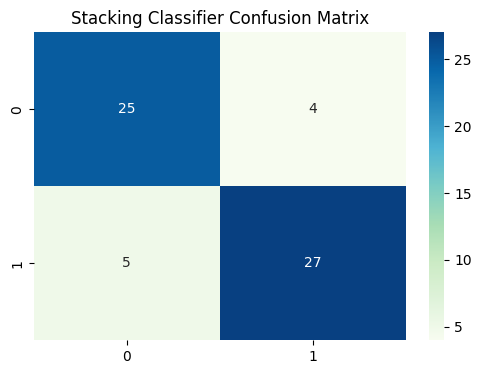

In [46]:
from sklearn.ensemble import StackingClassifier

# 1. Define the base models (estimators)
# This is the same list of tuples as before
base_estimators = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='rbf', probability=True, random_state=42))
]

# 2. Initialize the Stacking Classifier
# We tell it which models to use as a base...
# ...and which model to use as the 'final_estimator' (the meta-model)
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(),
    cv=5  # Use 5-fold cross-validation to generate the base predictions
)

# 3. Train the Stacking classifier
stacking_clf.fit(X_train, y_train)

# 4. Evaluate the Stacking classifier
y_pred_stack = stacking_clf.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f"--- Stacking Classifier ---")
print(f"Accuracy: {accuracy_stack * 100:.2f}%\n")
print(classification_report(y_test, y_pred_stack, target_names=['No Disease (0)', 'Disease (1)']))
print("\n")

# 5. Show Confusion Matrix
print("--- Stacking Classifier Confusion Matrix ---")
cm_stack = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_stack, annot=True, fmt='d', cmap='GnBu')
plt.title('Stacking Classifier Confusion Matrix')
plt.show()

--- Training and Evaluating Models ---
Logistic Regression: 83.61%
KNN: 86.89%
Naive Bayes: 83.61%
SVM (RBF Kernel): 85.25%
Decision Tree: 80.33%
Random Forest: 86.89%
XGBoost: 81.97%


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:46:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM: 88.52%
CatBoost: 88.52%
MLP (Neural Network): 80.33%
Voting (Soft): 85.25%
Stacking: 85.25%
PCA + Logistic: 83.61%


/tmp/ipython-input-4275874640.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df['Accuracy'], y=results_df.index, palette='viridis')


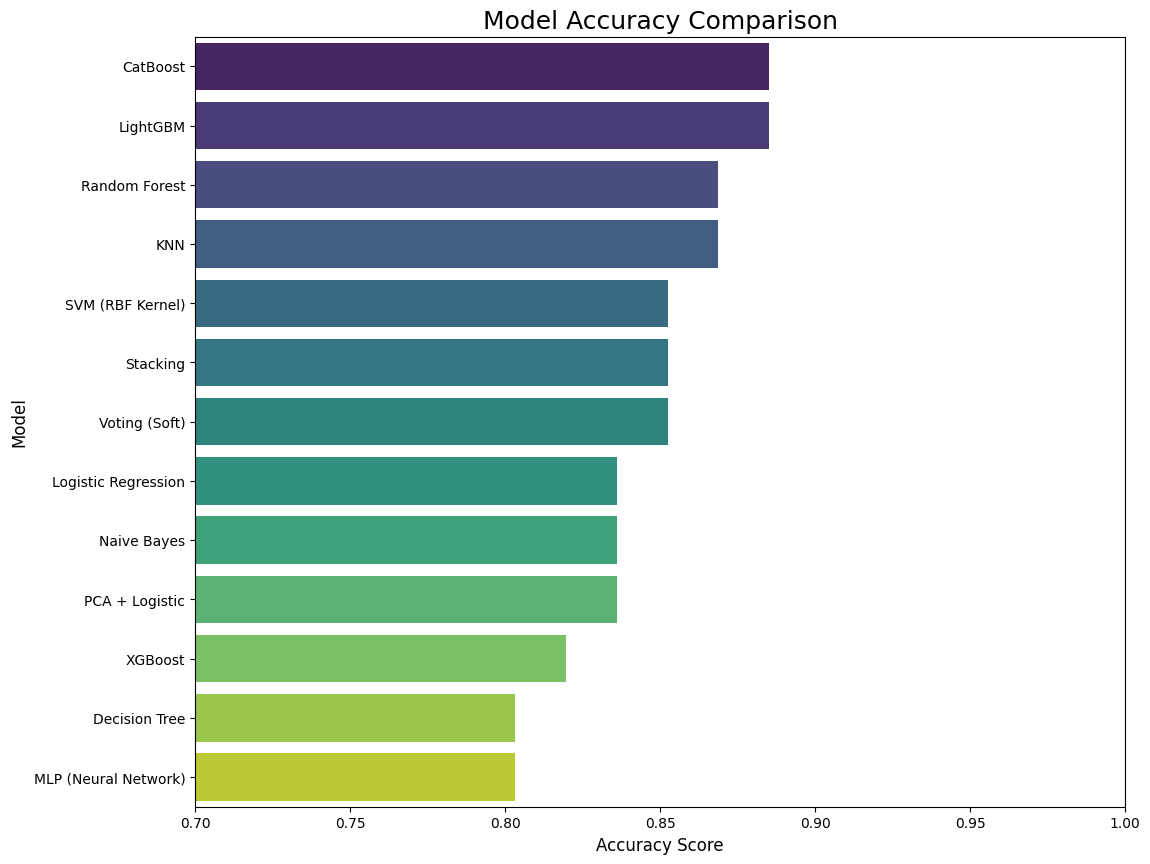

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

import xgboost as xgb
import lightgbm as lgb
import catboost as cb

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --- 1. FULL PREPROCESSING ---
# Ensure we are using the exact same data as your notebook
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
df = pd.read_csv(url, names=columns)

# Handle missing values '?'
df.replace('?', np.nan, inplace=True)
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])
df = df.astype(float)

# Binarize target
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# One-Hot Encoding
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split and Scale
X = df_processed.drop('target', axis=1)
y = df_processed['target']
feature_names = X.columns # Save for later

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- 2. DEFINE ALL MODELS ---

# Create a dictionary to hold all models
models = {}

# Simple Models
models['Logistic Regression'] = LogisticRegression(random_state=42)
models['KNN'] = KNeighborsClassifier(n_neighbors=23) # Using our k from the elbow plot
models['Naive Bayes'] = GaussianNB()

# SVM
models['SVM (RBF Kernel)'] = SVC(kernel='rbf', probability=True, random_state=42)

# Trees
models['Decision Tree'] = DecisionTreeClassifier(random_state=42)
models['Random Forest'] = RandomForestClassifier(n_estimators=100, random_state=42)

# Boosting
models['XGBoost'] = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
models['LightGBM'] = lgb.LGBMClassifier(random_state=42, verbose=-1) # verbose=-1 to suppress output
models['CatBoost'] = cb.CatBoostClassifier(random_state=42, verbose=0) # verbose=0 to suppress output

# Neural Network
models['MLP (Neural Network)'] = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42, early_stopping=True, n_iter_no_change=15)

# Ensembles (using pre-defined models for stacking)
clf_lr = LogisticRegression(random_state=42)
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_svm = SVC(kernel='rbf', probability=True, random_state=42)

models['Voting (Soft)'] = VotingClassifier(estimators=[('lr', clf_lr), ('rf', clf_rf), ('svm', clf_svm)], voting='soft')
models['Stacking'] = StackingClassifier(estimators=[('rf', clf_rf), ('svm', clf_svm)], final_estimator=clf_lr, cv=5)

# PCA + Classifier (This one needs different data)
pca = PCA(n_components=15) # Using 15 components from our 95% threshold
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pca_model = LogisticRegression(random_state=42)
pca_model.fit(X_train_pca, y_train)
y_pred_pca = pca_model.predict(X_test_pca)
pca_accuracy = accuracy_score(y_test, y_pred_pca)


# --- 3. TRAIN, EVALUATE, AND STORE RESULTS ---
results = {}

print("--- Training and Evaluating Models ---")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}: {accuracy*100:.2f}%")

# Add the special PCA result
results['PCA + Logistic'] = pca_accuracy
print(f"PCA + Logistic: {pca_accuracy*100:.2f}%")

# Convert results to a DataFrame for plotting
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# --- 4. VISUALIZE THE COMPARISON ---
plt.figure(figsize=(12, 10))
sns.barplot(x=results_df['Accuracy'], y=results_df.index, palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=18)
plt.xlabel('Accuracy Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0.7, 1.0) # Zoom in on the top performers
plt.show()

In [48]:
import pandas as pd
import numpy as np

# Import all preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

# Import all metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- 1. FULL PREPROCESSING (from your notebook) ---
# Load the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
df = pd.read_csv(url, names=columns)

# Handle missing values '?'
df.replace('?', np.nan, inplace=True)
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])
df = df.astype(float)

# Binarize target
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# One-Hot Encoding
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split and Scale
X = df_processed.drop('target', axis=1)
y = df_processed['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- 2. DEFINE ALL MODELS ---
# We use the same settings we found in previous steps (like k=23 for KNN)
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'KNN (k=23)': KNeighborsClassifier(n_neighbors=23),
    'Naive Bayes': GaussianNB(),
    'SVM (RBF Kernel)': SVC(kernel='rbf', probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': cb.CatBoostClassifier(random_state=42, verbose=0),
    'MLP (Neural Network)': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42, early_stopping=True, n_iter_no_change=15)
}

# Define ensemble base models
clf_lr = LogisticRegression(random_state=42, max_iter=1000)
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_svm = SVC(kernel='rbf', probability=True, random_state=42)

models['Voting (Soft)'] = VotingClassifier(estimators=[('lr', clf_lr), ('rf', clf_rf), ('svm', clf_svm)], voting='soft')
models['Stacking'] = StackingClassifier(estimators=[('rf', clf_rf), ('svm', clf_svm)], final_estimator=clf_lr, cv=5)


# --- 3. TRAIN AND EVALUATE MODELS ---
results_list = []

print("Training and evaluating all models, please wait...")

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics (using 'weighted' for precision/recall/f1 to account for any class imbalance)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append to our results list
    results_list.append([name, accuracy, precision, recall, f1])

# --- 4. HANDLE PCA + LOGISTIC MODEL SEPARATELY ---
# Apply PCA (using 15 components to keep 95% variance, as found before)
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train and evaluate the PCA model
pca_model = LogisticRegression(random_state=42)
pca_model.fit(X_train_pca, y_train)
y_pred_pca = pca_model.predict(X_test_pca)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_pca)
precision = precision_score(y_test, y_pred_pca, average='weighted')
recall = recall_score(y_test, y_pred_pca, average='weighted')
f1 = f1_score(y_test, y_pred_pca, average='weighted')

results_list.append(['PCA + Logistic (15c)', accuracy, precision, recall, f1])


# --- 5. CREATE AND DISPLAY THE FINAL RESULTS TABLE ---
# Convert list to DataFrame
results_df = pd.DataFrame(results_list, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Sort by F1-Score (a great all-around metric)
results_df_sorted = results_df.sort_values(by='F1-Score', ascending=False)

# Display the final, formatted table
print("\n--- Final Model Performance Comparison ---")
print(results_df_sorted.to_string(index=False, float_format="%.4f"))

Training and evaluating all models, please wait...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:47:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- Final Model Performance Comparison ---
               Model  Accuracy  Precision  Recall  F1-Score
            CatBoost    0.8852     0.8858  0.8852    0.8853
            LightGBM    0.8852     0.8858  0.8852    0.8853
       Random Forest    0.8689     0.8709  0.8689    0.8689
          KNN (k=23)    0.8689     0.8761  0.8689    0.8687
    SVM (RBF Kernel)    0.8525     0.8531  0.8525    0.8525
            Stacking    0.8525     0.8531  0.8525    0.8525
       Voting (Soft)    0.8525     0.8531  0.8525    0.8525
 Logistic Regression    0.8361     0.8361  0.8361    0.8361
PCA + Logistic (15c)    0.8361     0.8361  0.8361    0.8361
         Naive Bayes    0.8361     0.8429  0.8361    0.8359
             XGBoost    0.8197     0.8236  0.8197    0.8197
MLP (Neural Network)    0.8033     0.8052  0.8033    0.8034
       Decision Tree    0.8033     0.8040  0.8033    0.8027


In [49]:
print(Out[8])


KeyError: 8